# Analytic solution for flow around a defect

* The purpose of this script is to assist in finding an analytic solution to the flow about a uniaxial defect
* For this, we first calculate the source terms in the Biharmonic equation due to the nematic configuration
* Then we try to solve the resulting Biharmonic equation analytically

In [148]:
save_folder = r'analytic-solution-for-defect-flow'
if not os.path.isdir(save_folder):
    os.makedirs(save_folder)

In [1]:
from sympy import *

x, y, z = symbols('x y z')
i, j, k, m, p = symbols('i j k m p')
xi = Matrix([x, y, z])
lims = range(0, 3)

## Generate director field

In [2]:
phi, r = symbols('phi r')
S = symbols('S')
n = Matrix([cos(k*phi), sin(k*phi), 0])

In [3]:
Q = zeros(3)
for i in lims:
    for j in lims:
        Q[i, j] = (S/2)*( 3*n[i]*n[j] - KroneckerDelta(i, j) )
        
Q = simplify(Q)
Q

Matrix([
[S*(3*cos(k*phi)**2 - 1)/2,        3*S*sin(2*k*phi)/4,    0],
[       3*S*sin(2*k*phi)/4, S*(3*sin(k*phi)**2 - 1)/2,    0],
[                        0,                         0, -S/2]])

In [4]:
print(latex(Q))

\left[\begin{matrix}\frac{S \left(3 \cos^{2}{\left(k \phi \right)} - 1\right)}{2} & \frac{3 S \sin{\left(2 k \phi \right)}}{4} & 0\\\frac{3 S \sin{\left(2 k \phi \right)}}{4} & \frac{S \left(3 \sin^{2}{\left(k \phi \right)} - 1\right)}{2} & 0\\0 & 0 & - \frac{S}{2}\end{matrix}\right]


## Write $Q$ in Cartesian coordinates

* Recall that $\phi = \text{atan2}\left(y, x\right)$

In [5]:
Q = Q.subs(phi, atan2(y, x))

## Generate flow source terms

In [6]:
Phi_L1 = -sum(Eijk(3, p + 1, i + 1)
              *diff(diff(diff(Q[k, l], xi[j]), xi[j]), xi[p])
              *diff(Q[k, l], xi[i])
              for i in lims
              for j in lims
              for k in lims
              for l in lims
              for p in lims
              )

In [7]:
Phi_L1

-3*S*k*x*(6*S*k**3*y**3*cos(2*k*atan2(y, x))/(x**2 + y**2)**3 + 18*S*k**2*x*y**2*sin(2*k*atan2(y, x))/(x**2 + y**2)**3 - 12*S*k*x**2*y*cos(2*k*atan2(y, x))/(x**2 + y**2)**3 + 3*S*k*y*cos(2*k*atan2(y, x))/(x**2 + y**2)**2)*cos(2*k*atan2(y, x))/(x**2 + y**2) + 3*S*k*x*(-12*S*k**3*y**3*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2)**3 - 18*S*k**2*x*y**2*sin(k*atan2(y, x))**2/(x**2 + y**2)**3 + 18*S*k**2*x*y**2*cos(k*atan2(y, x))**2/(x**2 + y**2)**3 + 24*S*k*x**2*y*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2)**3 - 6*S*k*y*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2)**2)*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2) - 3*S*k*x*(12*S*k**3*y**3*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2)**3 + 18*S*k**2*x*y**2*sin(k*atan2(y, x))**2/(x**2 + y**2)**3 - 18*S*k**2*x*y**2*cos(k*atan2(y, x))**2/(x**2 + y**2)**3 - 24*S*k*x**2*y*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2)**3 + 6*S*k*y*sin(k*atan2(y, x))*cos(k*atan2(y, x))/(x**2 + y**2)**2)*sin(k*atan2(y, x))*cos

In [8]:
simplify(Phi_L1)

0

## Well, I guess there is no flow associated with the isotropic term

## Let's try the $\kappa_3$ term

In [9]:
f1 = sum(Eijk(3, p + 1, i + 1)
          *diff(diff(Q[j, m], xi[j]), xi[p])
          *diff(Q[k, l], xi[m])
          *diff(Q[k, l], xi[i])
          for i in lims
          for j in lims
          for k in lims
          for l in lims
          for m in lims
          for p in lims
         )

In [10]:
f2 = sum(Eijk(3, p + 1, i + 1)
         *diff(Q[j, m], xi[j])
         *diff(diff(Q[k, l], xi[p]), xi[m])
         *diff(Q[k, l], xi[i])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

In [11]:
f3 = sum(Eijk(3, p + 1, i + 1)
         *diff(Q[j, m], xi[p])
         *diff(diff(Q[k, l], xi[j]), xi[m])
         *diff(Q[k, l], xi[i])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

In [12]:
f4 = sum(Eijk(3, p + 1, i + 1)
         *Q[j, m]
         *diff(diff(diff(Q[k, l], xi[p]), xi[j]), xi[m])
         *diff(Q[k, l], xi[i])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

In [13]:
f5 = sum(Eijk(3, p + 1, i + 1)
         *diff(Q[j, m], xi[p])
         *diff(Q[k, l], xi[m])
         *diff(diff(Q[k, l], xi[i]), xi[j])
         for i in lims
         for j in lims
         for k in lims
         for l in lims
         for m in lims
         for p in lims
        )

In [14]:
Phi_L3 = -simplify(f1 + f2 + f3 + f4 + f5)

## Put back into polar coordinates

In [15]:
Phi_L3 = simplify(Phi_L3.subs(x, r*cos(phi)).subs(y, r*sin(phi)))
Phi_L3

27*S**3*k**2*(4*k*(1 - cos(2*k*atan2(r*sin(phi), r*cos(phi))))**3*sin(2*phi) - 12*k*(1 - cos(2*k*atan2(r*sin(phi), r*cos(phi))))**2*sin(2*phi) + 4*k*(1 - cos(2*k*atan2(r*sin(phi), r*cos(phi))))**2*sin(2*k*atan2(r*sin(phi), r*cos(phi))) + 8*k*sin(2*phi) - 5*k*sin(2*k*atan2(r*sin(phi), r*cos(phi))) + 4*k*sin(4*k*atan2(r*sin(phi), r*cos(phi))) - k*sin(6*k*atan2(r*sin(phi), r*cos(phi))) + 17*k*sin(2*k*atan2(r*sin(phi), r*cos(phi)) - 2*phi)/2 - 9*k*sin(2*k*atan2(r*sin(phi), r*cos(phi)) + 2*phi)/2 - k*sin(6*k*atan2(r*sin(phi), r*cos(phi)) - 2*phi)/2 + k*sin(6*k*atan2(r*sin(phi), r*cos(phi)) + 2*phi)/2 - 4*(1 - cos(2*k*atan2(r*sin(phi), r*cos(phi))))**2*sin(2*k*atan2(r*sin(phi), r*cos(phi)) - 2*phi) - 4*(1 - cos(2*k*atan2(r*sin(phi), r*cos(phi))))**2*sin(2*k*atan2(r*sin(phi), r*cos(phi)) + 2*phi) - 3*sin(2*k*atan2(r*sin(phi), r*cos(phi)) - 2*phi) + 5*sin(2*k*atan2(r*sin(phi), r*cos(phi)) + 2*phi) - 4*sin(4*k*atan2(r*sin(phi), r*cos(phi)) - 2*phi) - 4*sin(4*k*atan2(r*sin(phi), r*cos(phi)) + 2*

## Let's get rid of those inverses

In [16]:
Phi_L3 = simplify(Phi_L3.subs(atan2(r*sin(phi), r*cos(phi)), phi))
Phi_L3

27*S**3*k**2*(64*k*sin(2*phi)*sin(k*phi)**6 - 96*k*sin(2*phi)*sin(k*phi)**4 + 16*k*sin(2*phi) + 32*k*sin(k*phi)**4*sin(2*k*phi) - 10*k*sin(2*k*phi) + 8*k*sin(4*k*phi) - 2*k*sin(6*k*phi) + 17*k*sin(2*phi*(k - 1)) - 9*k*sin(2*phi*(k + 1)) - k*sin(2*phi*(3*k - 1)) + k*sin(2*phi*(3*k + 1)) - 32*sin(k*phi)**4*sin(2*phi*(k - 1)) - 32*sin(k*phi)**4*sin(2*phi*(k + 1)) - 6*sin(2*phi*(k - 1)) + 10*sin(2*phi*(k + 1)) - 8*sin(2*phi*(2*k - 1)) - 8*sin(2*phi*(2*k + 1)) + 2*sin(2*phi*(3*k - 1)) + 2*sin(2*phi*(3*k + 1)))/(32*r**4)

## Now look at the specific defect we want ($+1/2$)

In [17]:
Phi_L3 = simplify(Phi_L3.subs(k, Rational(1, 2)))
Phi_L3

27*S**3*(64*sin(phi/2)**6*sin(2*phi) + 96*sin(phi/2)**4*sin(phi) - 96*sin(phi/2)**4*sin(2*phi) - 64*sin(phi/2)**4*sin(3*phi) - 12*sin(phi) + 24*sin(2*phi) + 9*sin(3*phi) - 16*sin(4*phi) + 5*sin(5*phi))/(256*r**4)

In [18]:
print(latex(Phi_L3))

\frac{27 S^{3} \left(64 \sin^{6}{\left(\frac{\phi}{2} \right)} \sin{\left(2 \phi \right)} + 96 \sin^{4}{\left(\frac{\phi}{2} \right)} \sin{\left(\phi \right)} - 96 \sin^{4}{\left(\frac{\phi}{2} \right)} \sin{\left(2 \phi \right)} - 64 \sin^{4}{\left(\frac{\phi}{2} \right)} \sin{\left(3 \phi \right)} - 12 \sin{\left(\phi \right)} + 24 \sin{\left(2 \phi \right)} + 9 \sin{\left(3 \phi \right)} - 16 \sin{\left(4 \phi \right)} + 5 \sin{\left(5 \phi \right)}\right)}{256 r^{4}}


## We should check both of these results to make sure that they line up with our numerical estimates

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import os
import sys

In [20]:
sys.path.insert(0, os.path.join(os.path.abspath('..'), 'src'))

In [21]:
import LiquidCrystalHelper as lch
import FiniteDifference as fd
from importlib import reload

In [22]:
reload(lch)

<module 'LiquidCrystalHelper' from 'C:\\Users\\lucas\\Documents\\Grad Work\\Summer Research 2020\\LiquidCrystalHydrodynamics\\src\\LiquidCrystalHelper.py'>

In [23]:
dpi = 300
mpl.rcParams['figure.dpi'] = dpi

## First generate configuration given above

In [24]:
l = 10
n = 1000

x_num = np.linspace(-l, l, num=n)
dx = x_num[1] - x_num[0]
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')
phi_num = (1/2)*np.arctan2(Y, X)
S_num = np.ones(phi_num.shape)

Q_num = lch.uniaxialQ(S_num, phi_num)
eta, mu, nu = lch.auxVars(Q_num)

## Need to fix calcQEigenvals and calcQEigenvecs to account for different scaling

## Check that it looks right

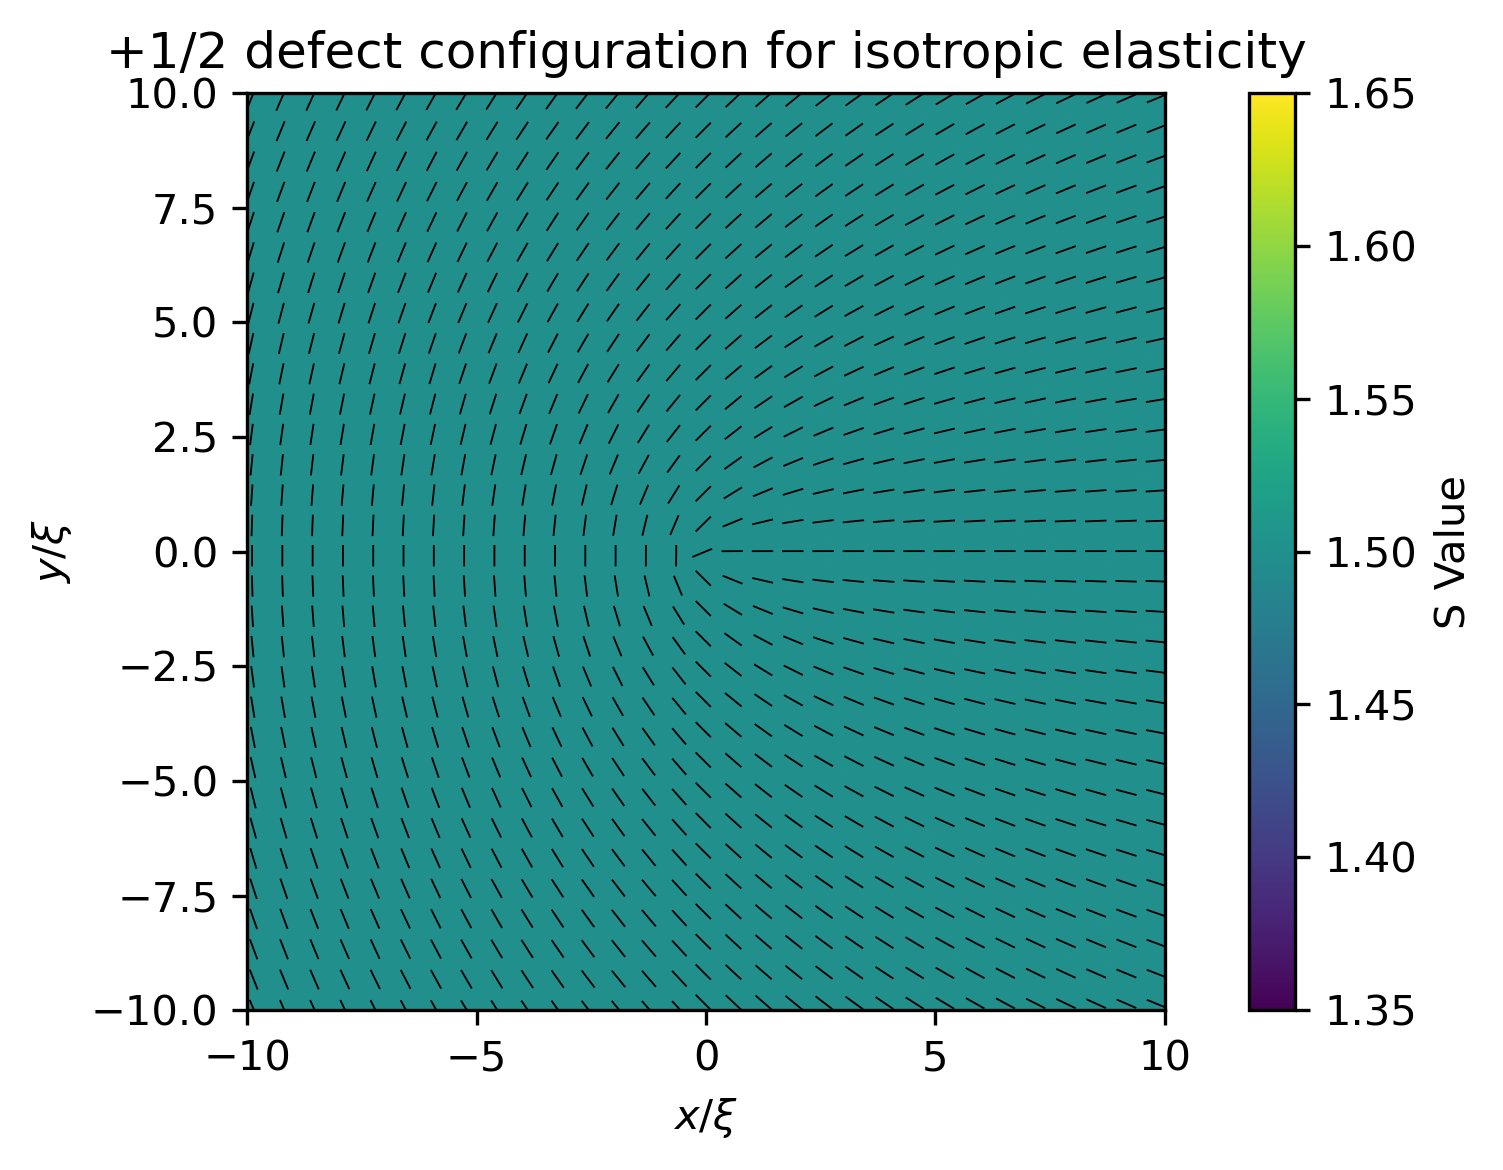

In [25]:
S_cutoff = 0.2
sparse_shape = (30, 30)

lambda_max = lch.calcQEigenvals(eta, mu, nu)
U, V = lch.calcQEigenvecs(eta, mu, nu, lambda_max, S_cutoff)

sparse_idx = lch.sparseIdx(eta.shape, sparse_shape)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, (3/2)*lambda_max)
q = ax.quiver(X[sparse_idx], Y[sparse_idx], U[sparse_idx], V[sparse_idx],
              headwidth=0, pivot='middle', headaxislength=5, scale=30, width=0.002)

fig.colorbar(c, ax=ax, label="S Value")
ax.set_title("+1/2 defect configuration for isotropic elasticity")
ax.set_xlabel(r"$x/\xi$")
ax.set_ylabel(r"$y/\xi$")
ax.set_aspect('equal', 'box')
fig.tight_layout()

## Then create isotropic biharmonic source term

In [26]:
Phi_L1_num = lch.Phi_L1(eta, mu, nu, dx)

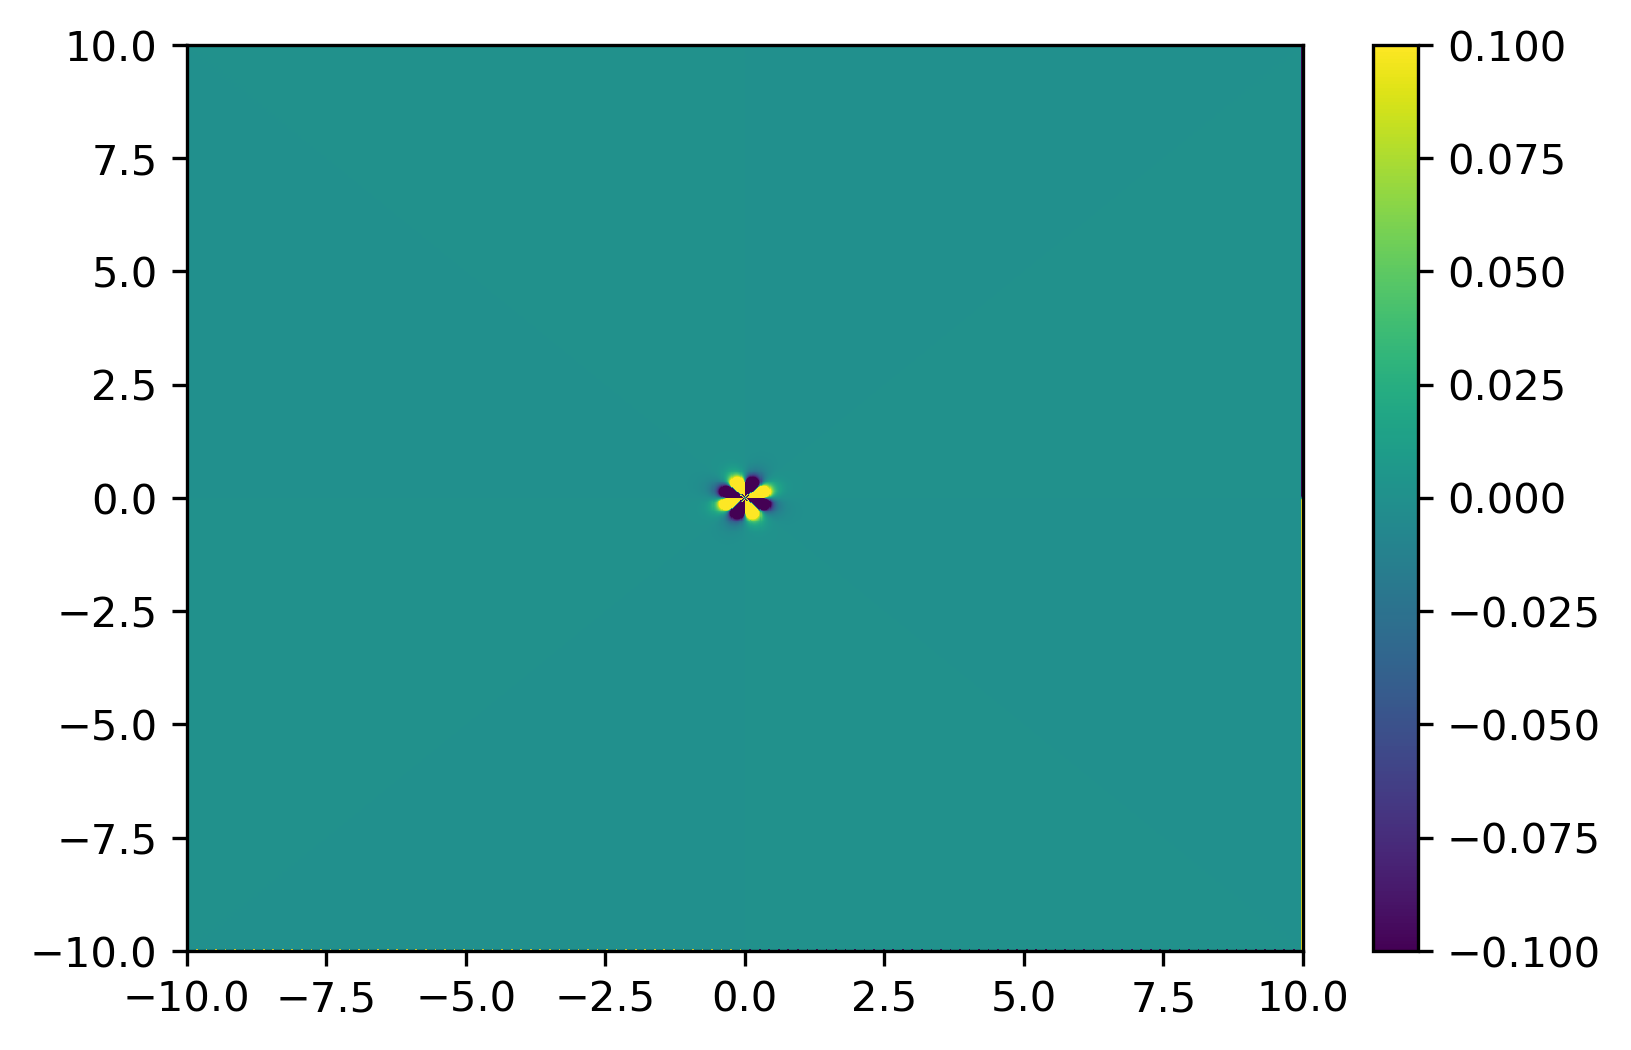

In [28]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Phi_L1_num, vmin=-.1, vmax=.1)
fig.colorbar(c, ax=ax)
# ax.set_xlim((-0.5, 0.5))
# ax.set_ylim((-0.5, 0.5))

## Having trouble understanding why it's not 0 if the analytic solution says it ought to be

## Let's look at the third term

In [29]:
Phi_L3_expr = lambdify([r, phi], Phi_L3.subs(S, 1), modules=["scipy", "numpy"])
R = np.sqrt(X**2 + Y**2)
Phi = np.arctan2(Y, X)
Phi_L3_sym = Phi_L3_expr(R, Phi)

(-2.0, 2.0)

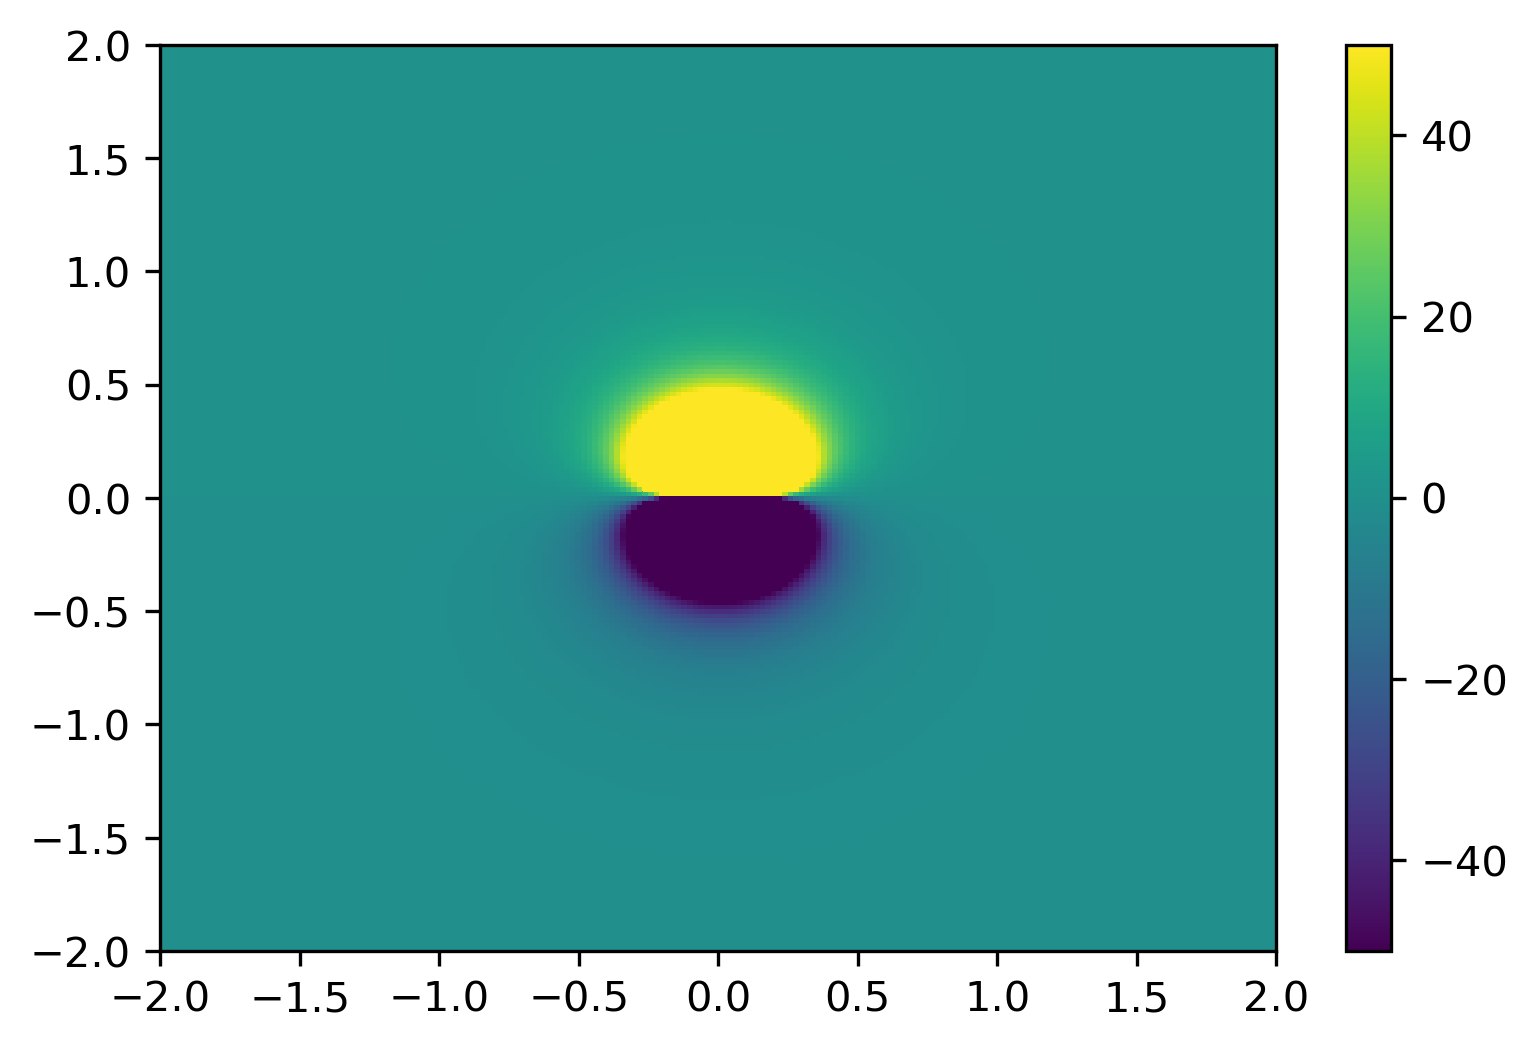

In [30]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Phi_L3_sym, vmin=-50, vmax=50)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

In [31]:
Phi_L3_num = lch.Phi_L3(eta, mu, nu, dx)

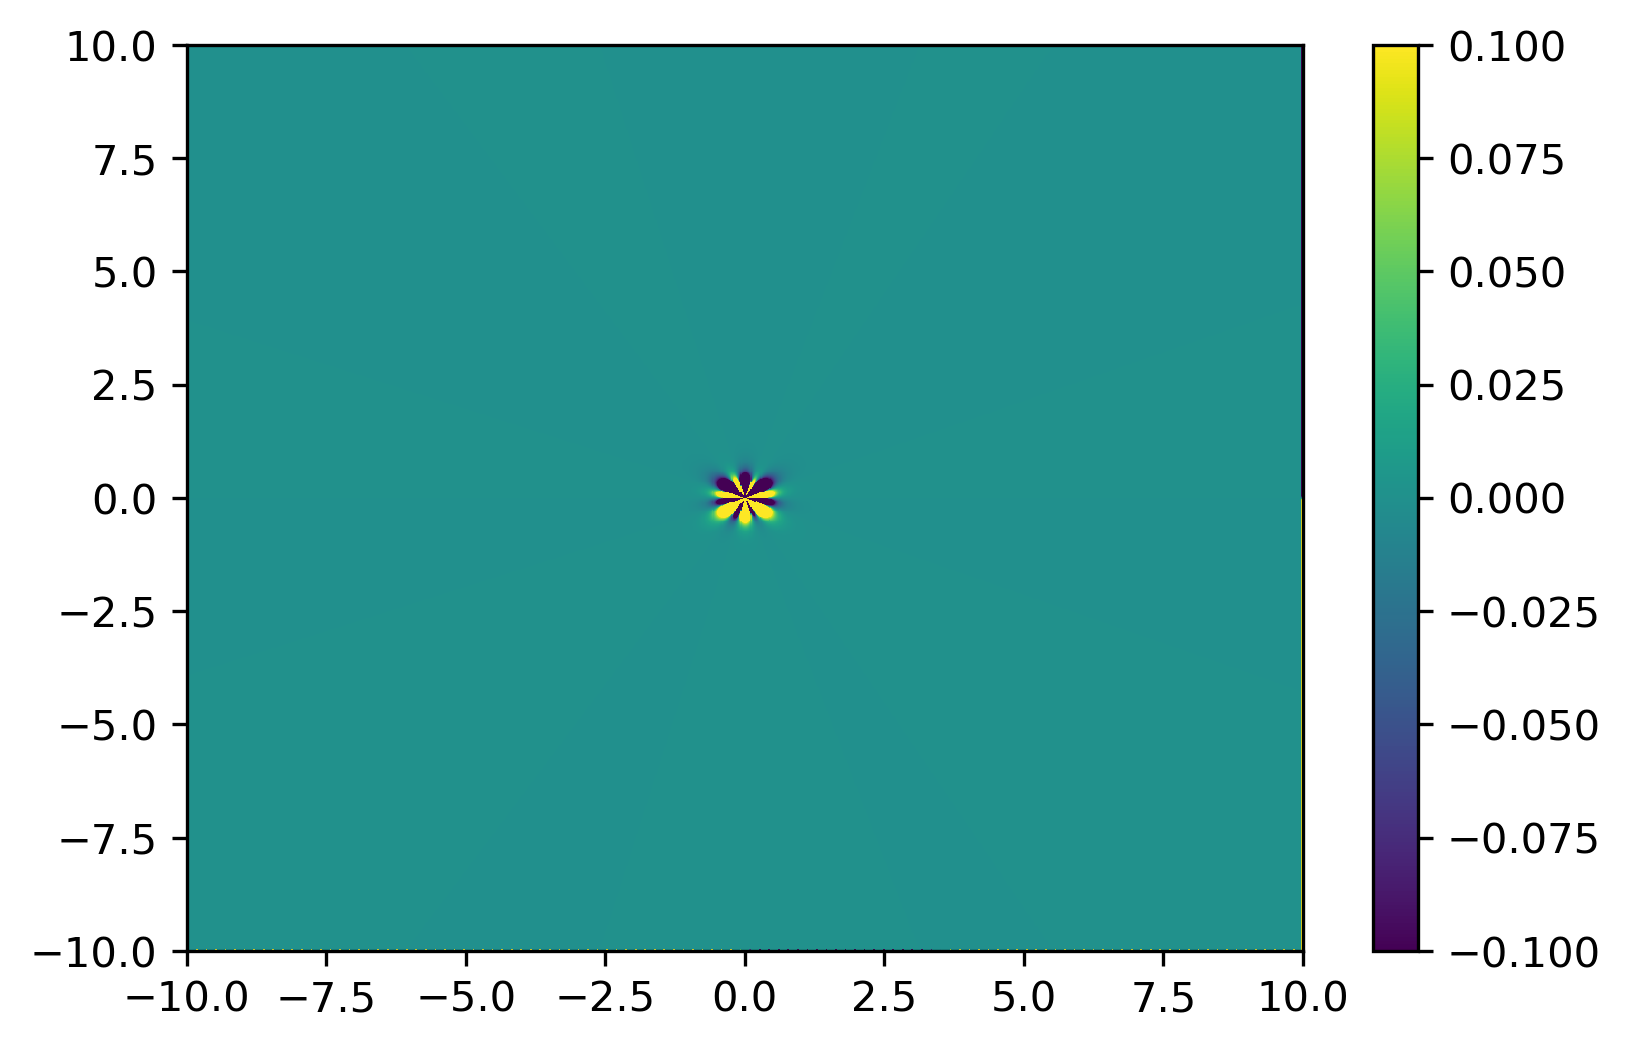

In [33]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Phi_L3_num - Phi_L3_sym, vmin=-0.1, vmax=0.1)
fig.colorbar(c, ax=ax)
# ax.set_xlim((-2, 2))
# ax.set_ylim((-2, 2))

## Things I could try to diagnose:

* ~~Make sure that the $Q$ that I have generated is the same as the symbolic one~~
* ~~Make sure that the numerical and symbolic expressions for $\Phi_{L1}$ and $\Phi_{L3}$ are the same~~
* ~~See what would happen if I made $S$ a reasonable function of $r$ (not extendible)~~
* Could replace all of the cartesian derivatives with polar derivatives
* Look at the resulting flows from each of these situations
* Look at the source terms for Cody's defect (see the magnitude of them)

## Make sure the $Q$'s are actually the same

In [34]:
Q_num.shape

(3, 3, 1000, 1000)

In [35]:
Q_sym = lambdify([x, y], Q.subs(S, 1).subs(k, Rational(1, 2)))(X, Y)
Q_sym_flat = np.zeros(Q_num.shape)

for i in range(Q_num.shape[0]):
    for j in range(Q_num.shape[1]):
        Q_sym_flat[i, j, :, :] = Q_sym[i, j]
        
Q_sym = Q_sym_flat

eta_sym, mu_sym, nu_sym = lch.auxVars(Q_sym)

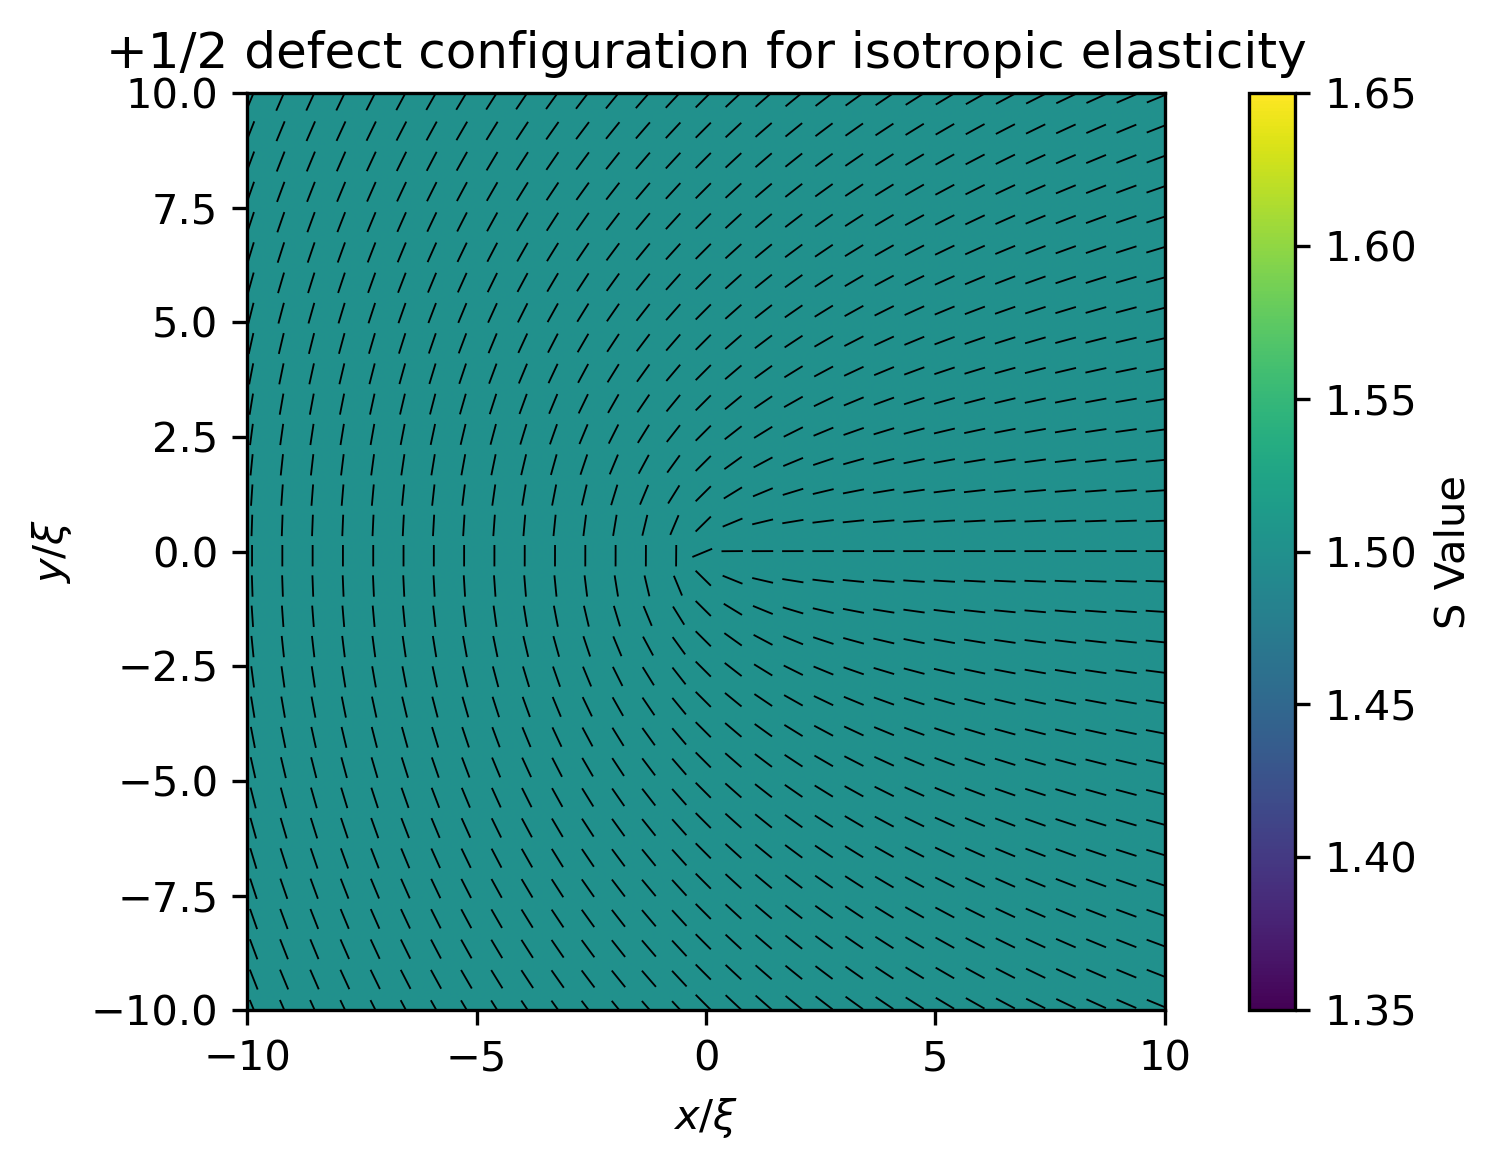

In [36]:
S_cutoff = 0.2
sparse_shape = (30, 30)

lambda_max = lch.calcQEigenvals(eta_sym, mu_sym, nu_sym)
U, V = lch.calcQEigenvecs(eta_sym, mu_sym, nu_sym, lambda_max, S_cutoff)

sparse_idx = lch.sparseIdx(eta_sym.shape, sparse_shape)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, (3/2)*lambda_max, vmin=1.35, vmax=1.65)
q = ax.quiver(X[sparse_idx], Y[sparse_idx], U[sparse_idx], V[sparse_idx],
              headwidth=0, pivot='middle', headaxislength=5, scale=30, width=0.002)

fig.colorbar(c, ax=ax, label="S Value")
ax.set_title("+1/2 defect configuration for isotropic elasticity")
ax.set_xlabel(r"$x/\xi$")
ax.set_ylabel(r"$y/\xi$")
ax.set_aspect('equal', 'box')
fig.tight_layout()

## Well it looks at least somewhat like it's supposed to

## Let's check the aux variables against one another

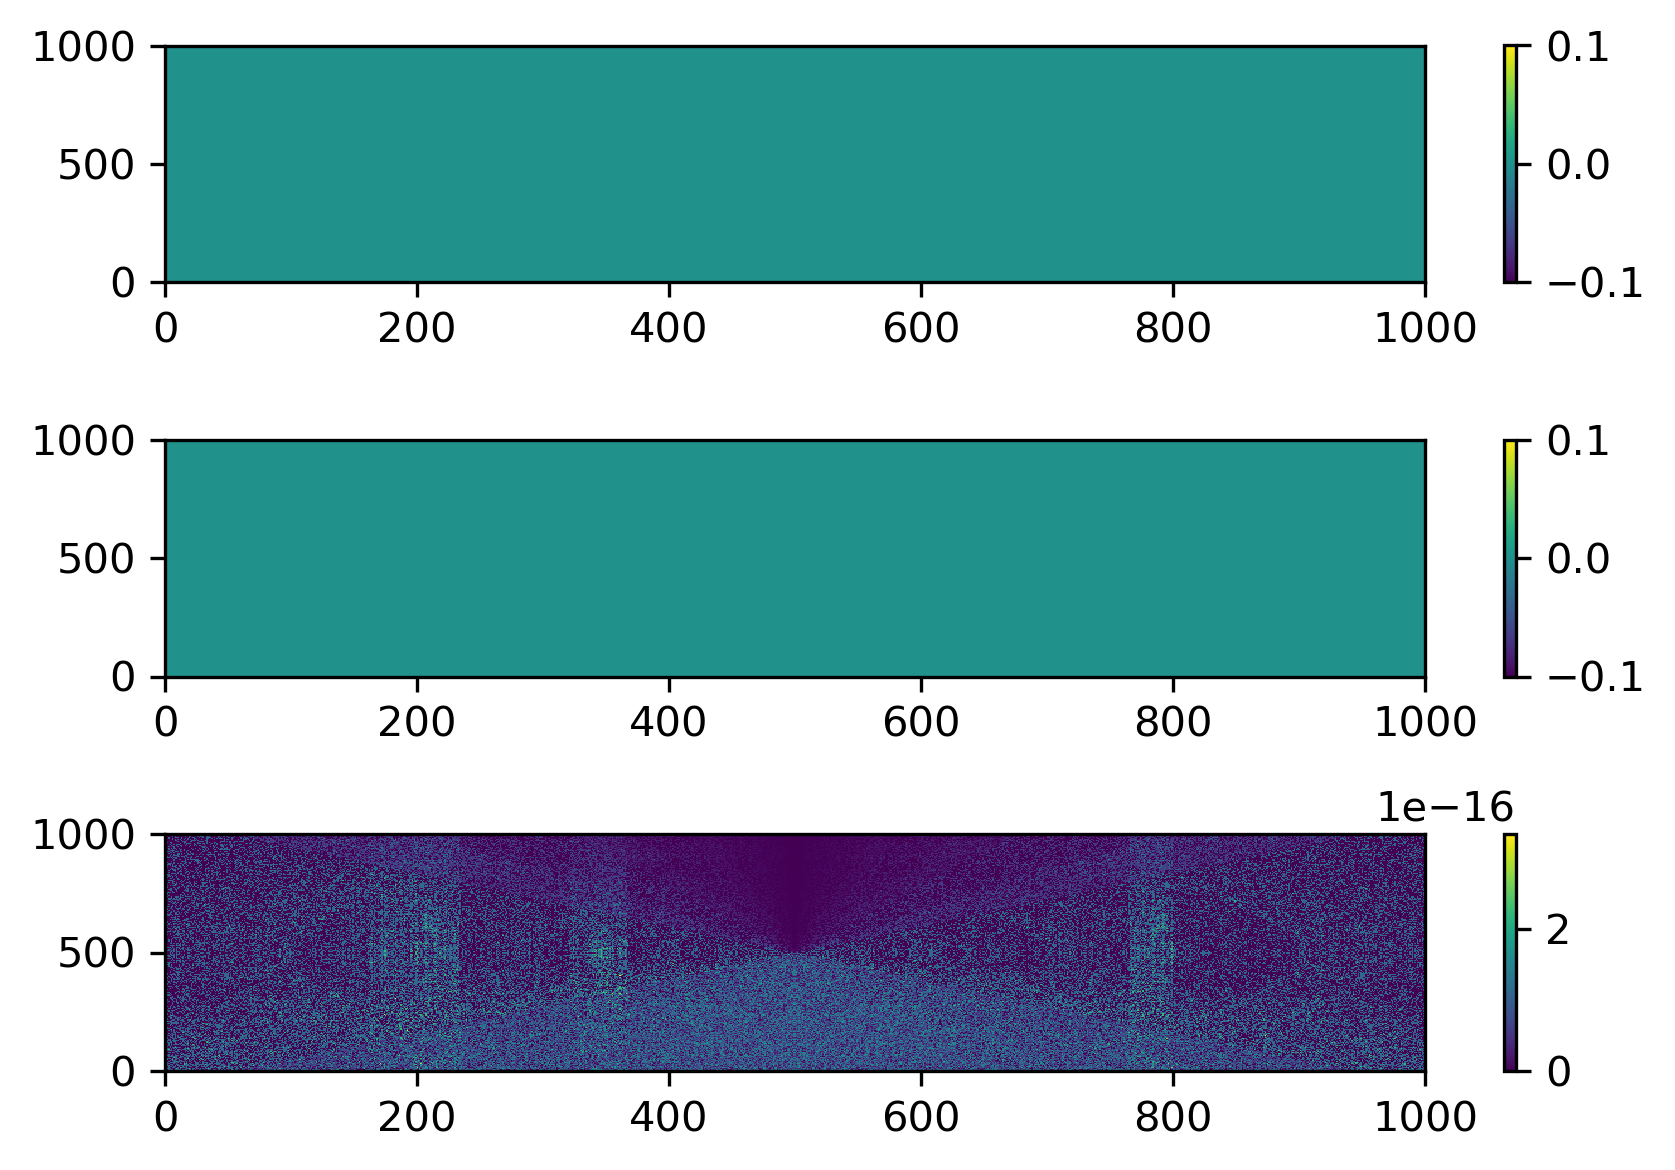

In [37]:
fig, ax = plt.subplots(3)

c = ax[0].pcolormesh(np.abs(eta - eta_sym))
fig.colorbar(c, ax=ax[0])

c = ax[1].pcolormesh(np.abs(mu - mu_sym))
fig.colorbar(c, ax=ax[1])

c = ax[2].pcolormesh(np.abs(nu - nu_sym))
fig.colorbar(c, ax=ax[2])

fig.tight_layout()

## Okay, it really seems like they're the same to a high degree

## Now we need to see whether they produce the same source terms

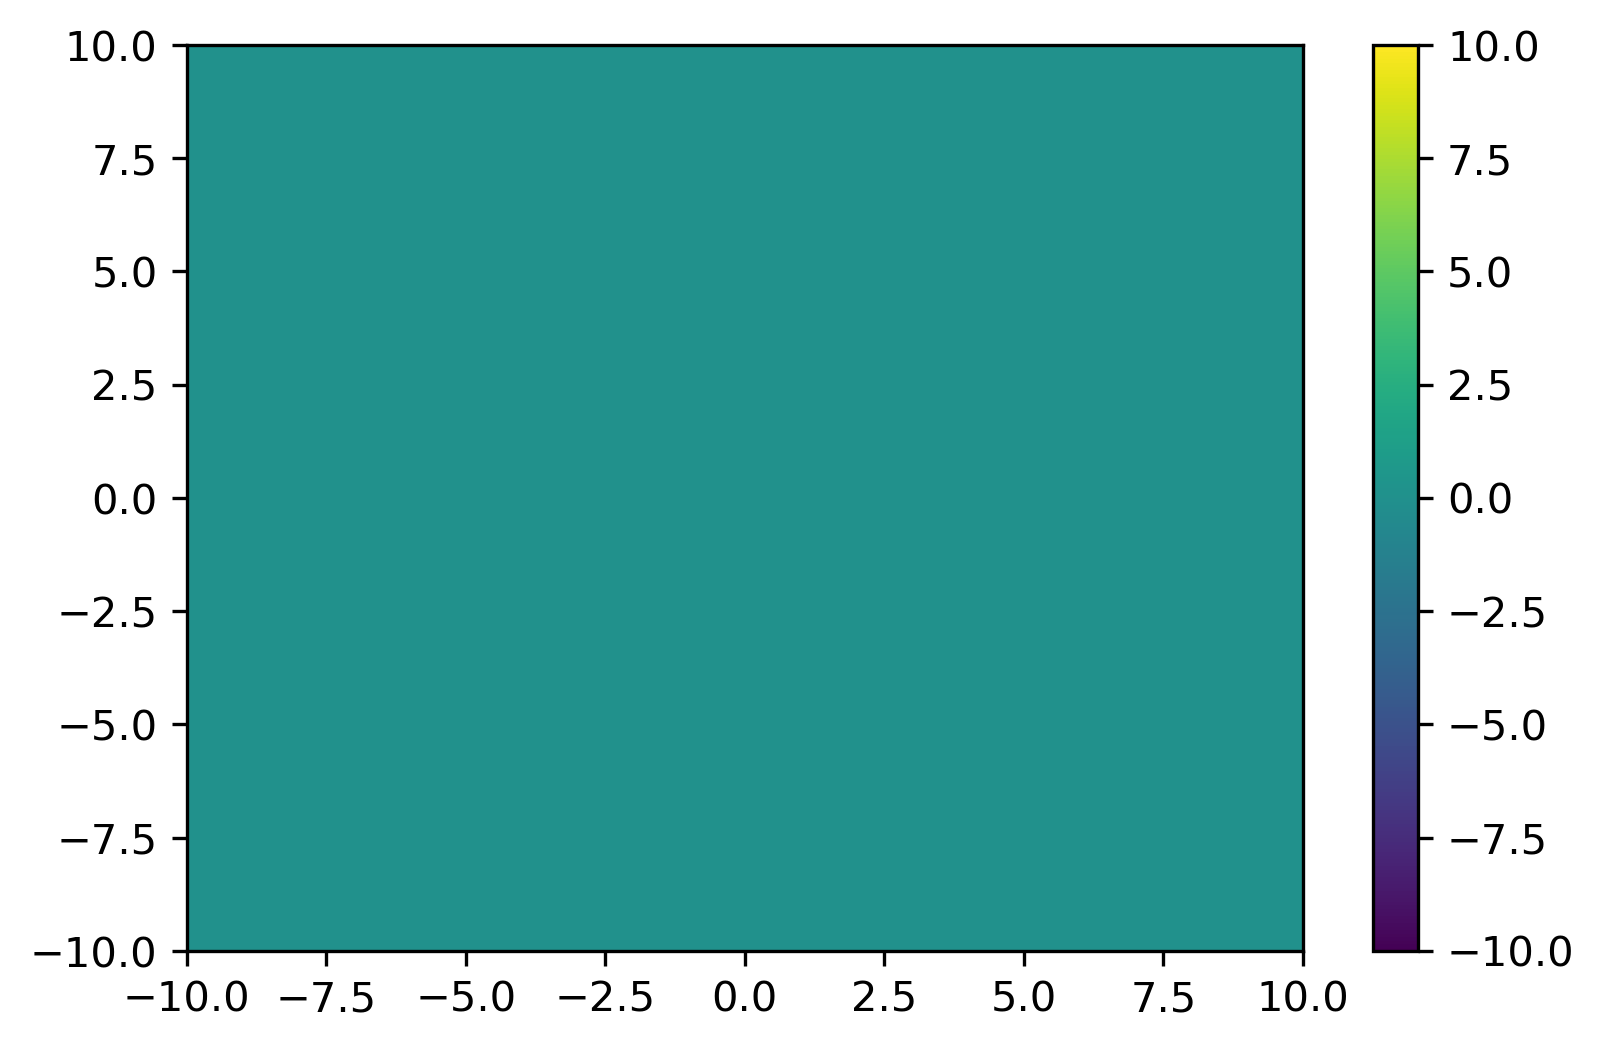

In [38]:
Phi_L1_sym = lch.Phi_L1(eta_sym, mu_sym, nu_sym, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, np.abs(Phi_L1_sym - Phi_L1_num), vmin=-10, vmax=10)
fig.colorbar(c, ax=ax)

## Okay, so it looks like there must be something wrong with how we are calculating the flow source terms

## Let's look at the unsimplified version of $\Phi_{L1}$

In [39]:
Phi_L1_expr = lambdify([x, y], Phi_L1.subs(S, 1).subs(k, Rational(1, 2)))
Phi_L1_num = Phi_L1_expr(X, Y)

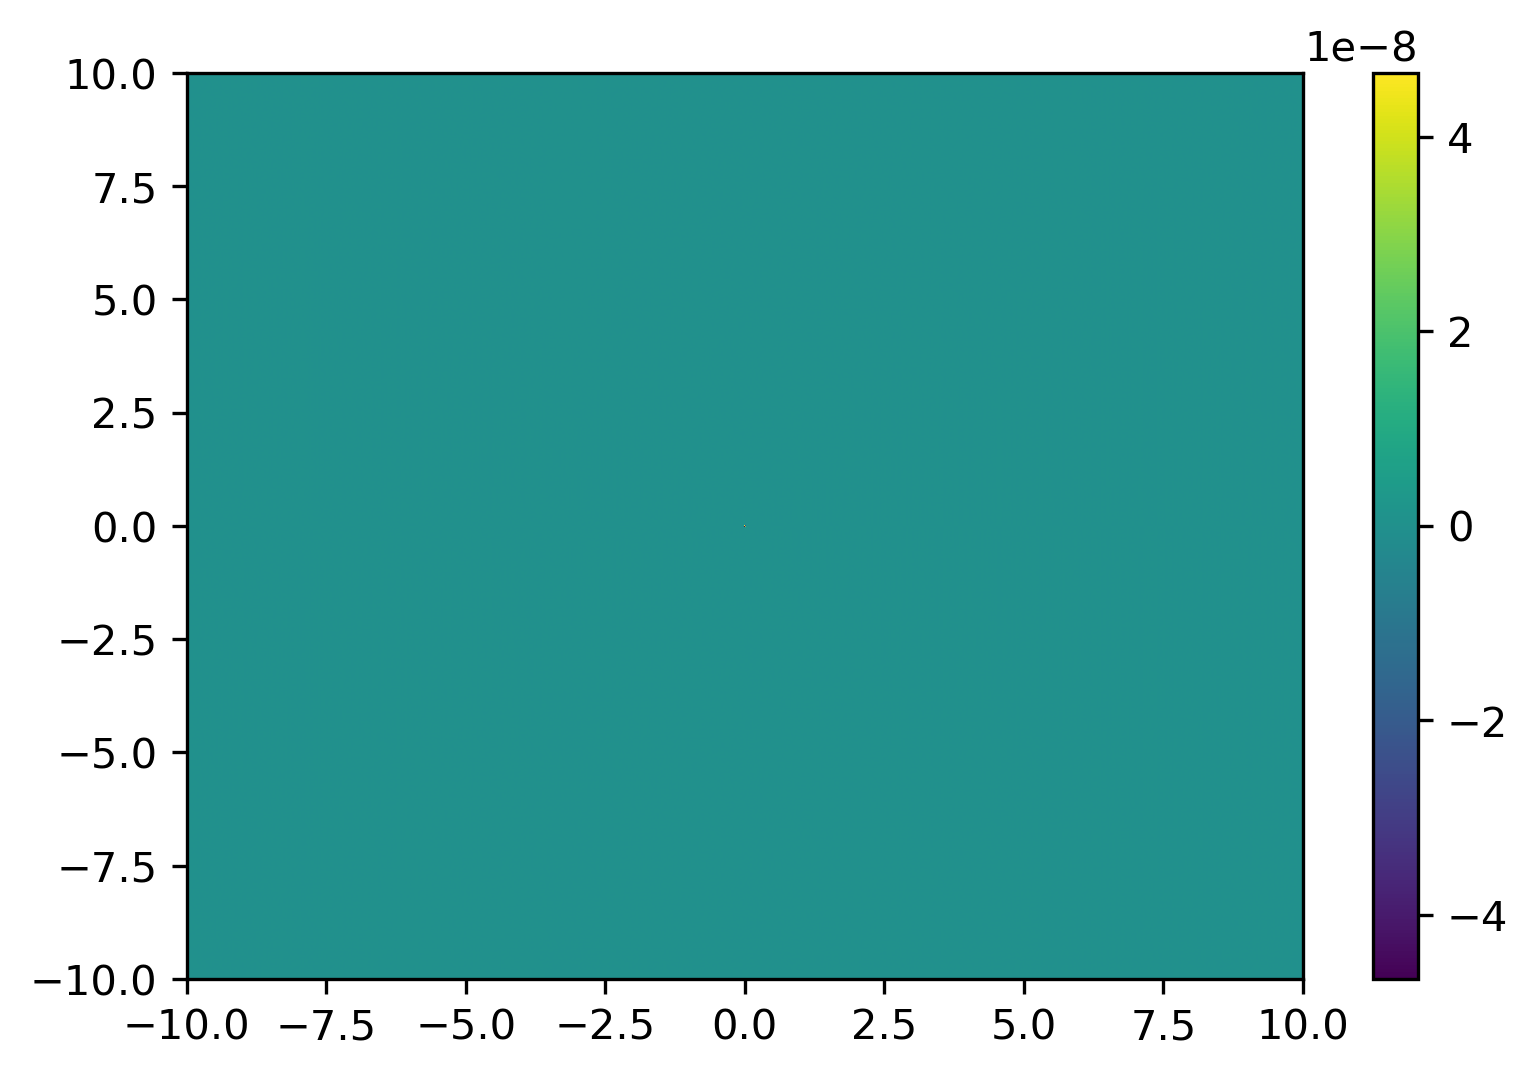

In [40]:
fig, ax = plt.subplots()

c = ax.pcolormesh(X, Y, Phi_L1_num)
fig.colorbar(c, ax=ax)

## Okay, let's generate a $Q$-tensor in terms of the auxiliary variables

In [41]:
eta = Function('eta', real=True)(x, y)
mu = Function('mu', real=True)(x, y)
nu = Function('nu', real=True)(x, y)

Q = Matrix([[2/sqrt(3)*eta, nu, 0],
            [nu, -1/sqrt(3)*eta + mu, 0],
            [0, 0, -1/sqrt(3)*eta - mu]])

## Then we'll calculate $\Phi_{L1}$ symbolically

In [42]:
Phi_L1 = -sum(Eijk(3, p + 1, i + 1)
              *diff(diff(diff(Q[k, l], xi[j]), xi[j]), xi[p])
              *diff(Q[k, l], xi[i])
              for i in lims
              for j in lims
              for k in lims
              for l in lims
              for p in lims
              )

Phi_L1 = simplify(Phi_L1)
Phi_L1

2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (y, 3)) + 2*Derivative(eta(x, y), x)*Derivative(eta(x, y), (x, 2), y) - 2*Derivative(eta(x, y), (x, 3))*Derivative(eta(x, y), y) - 2*Derivative(eta(x, y), y)*Derivative(eta(x, y), x, (y, 2)) + 2*Derivative(mu(x, y), x)*Derivative(mu(x, y), (y, 3)) + 2*Derivative(mu(x, y), x)*Derivative(mu(x, y), (x, 2), y) - 2*Derivative(mu(x, y), (x, 3))*Derivative(mu(x, y), y) - 2*Derivative(mu(x, y), y)*Derivative(mu(x, y), x, (y, 2)) + 2*Derivative(nu(x, y), x)*Derivative(nu(x, y), (y, 3)) + 2*Derivative(nu(x, y), x)*Derivative(nu(x, y), (x, 2), y) - 2*Derivative(nu(x, y), (x, 3))*Derivative(nu(x, y), y) - 2*Derivative(nu(x, y), y)*Derivative(nu(x, y), x, (y, 2))

## Then we need to plug in the appropriate expressions for $\eta$, $\mu$, and $\nu$

In [43]:
eta_expr = sqrt(3)*S/4 * (3*cos(k*phi)**2 - 1)
mu_expr = Rational(1, 2)*(3*sin(k*phi)**2)
nu_expr = 3*S/4*sin(2*k*phi)

In [44]:
Phi_L1.subs(eta, eta_expr).subs(mu, mu_expr).subs(nu, nu_expr).doit()

0

## Okay, it looks like it still works out to 0

## I guess we need to make $S$ a reasonable function? 

In [46]:
n = Matrix([cos(k*phi), sin(k*phi), 0])

In [47]:
Q = zeros(3)
for i in lims:
    for j in lims:
        Q[i, j] = (S/2)*( 3*n[i]*n[j] - KroneckerDelta(i, j) )
        
Q = simplify(Q)
Q

Matrix([
[S*(3*cos(k*phi)**2 - 1)/2,        3*S*sin(2*k*phi)/4,    0],
[       3*S*sin(2*k*phi)/4, S*(3*sin(k*phi)**2 - 1)/2,    0],
[                        0,                         0, -S/2]])

In [48]:
Q = Q.subs(S, 1 - exp(-r))
Q = Q.subs(phi, atan2(y, x)).subs(r, sqrt(x**2 + y**2))
Q

Matrix([
[(1 - exp(-sqrt(x**2 + y**2)))*(3*cos(k*atan2(y, x))**2 - 1)/2,        3*(1 - exp(-sqrt(x**2 + y**2)))*sin(2*k*atan2(y, x))/4,                                0],
[       3*(1 - exp(-sqrt(x**2 + y**2)))*sin(2*k*atan2(y, x))/4, (1 - exp(-sqrt(x**2 + y**2)))*(3*sin(k*atan2(y, x))**2 - 1)/2,                                0],
[                                                            0,                                                             0, -1/2 + exp(-sqrt(x**2 + y**2))/2]])

In [49]:
Phi_L1 = -sum(Eijk(3, p + 1, i + 1)
              *diff(diff(diff(Q[k, l], xi[j]), xi[j]), xi[p])
              *diff(Q[k, l], xi[i])
              for i in lims
              for j in lims
              for k in lims
              for l in lims
              for p in lims
              )

Phi_L1 = simplify(Phi_L1)

In [50]:
Phi_L1

0

## Okay, it looks like even when $S$ is a reasonable thing that goes to zero at the origin we still get that the source term is zero

## Let's try the same configuration numerically to see if the source term is any different

In [58]:
l = 10
n = 1000

x_num = np.linspace(-l, l, num=n)
dx = x_num[1] - x_num[0]
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')
phi_num = (1/2)*np.arctan2(Y, X)
S_num = 1 - np.exp( -np.sqrt(X**2 + Y**2) )
# S_num = np.ones(phi_num.shape)

Q_num = lch.uniaxialQ(S_num, phi_num)
eta, mu, nu = lch.auxVars(Q_num)

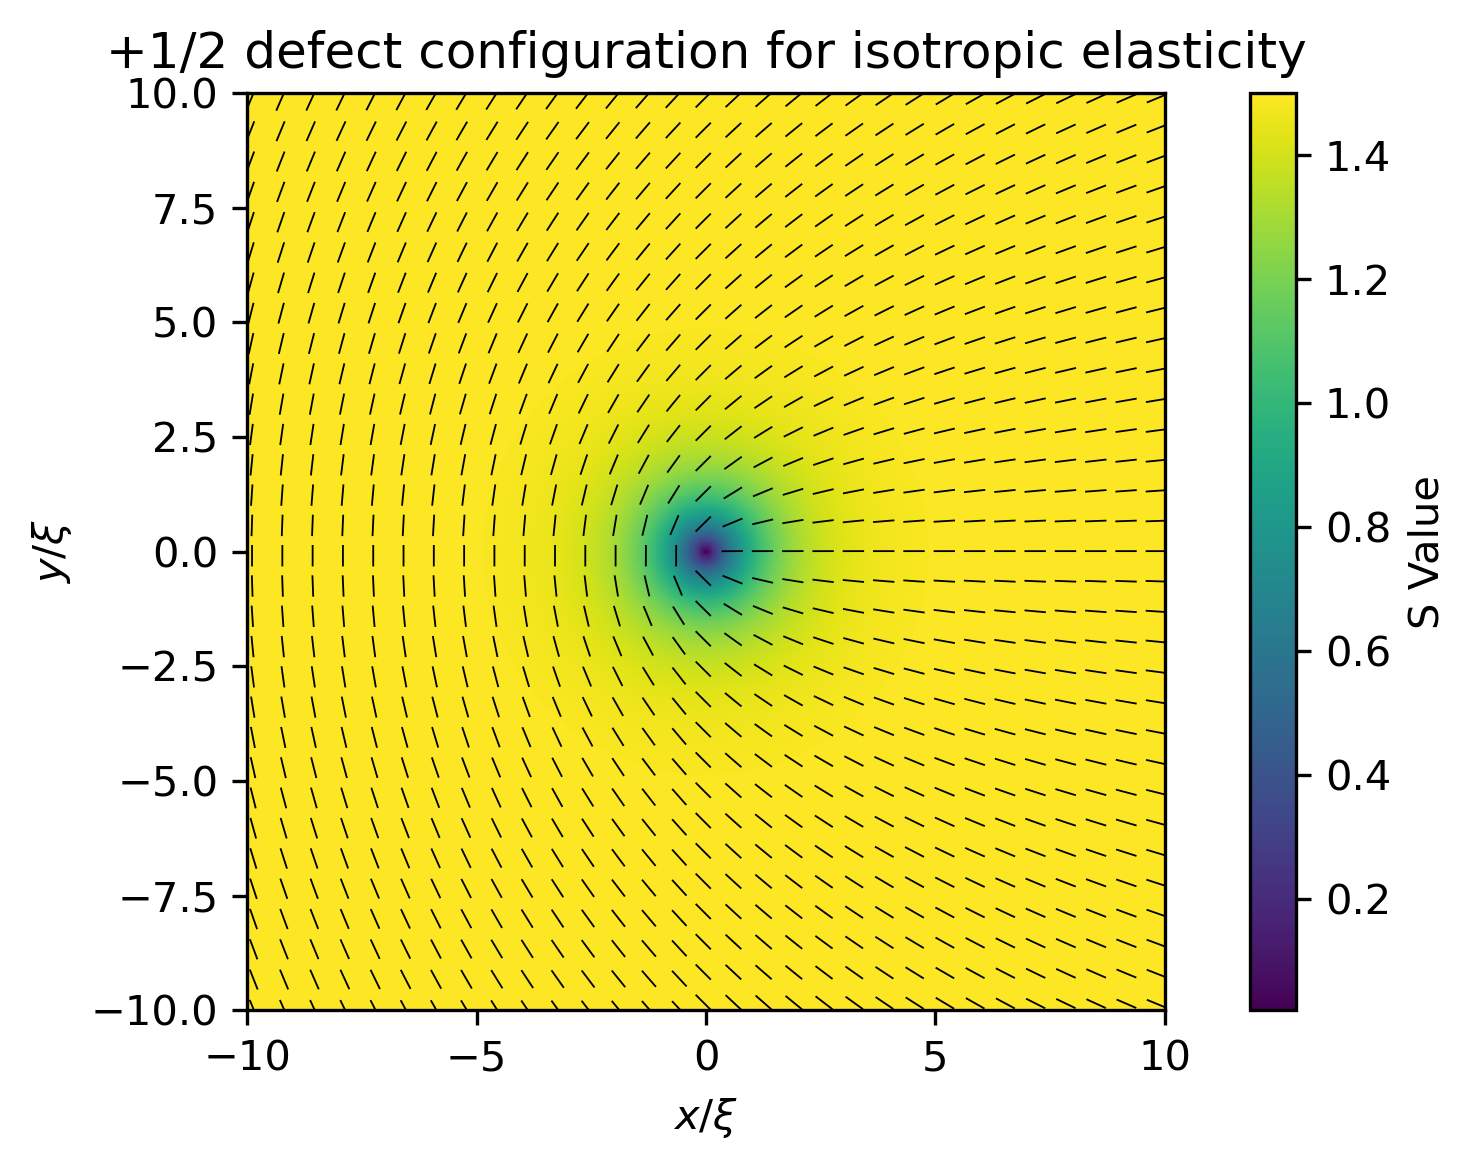

In [59]:
S_cutoff = 0.2
sparse_shape = (30, 30)

lambda_max = lch.calcQEigenvals(eta, mu, nu)
U, V = lch.calcQEigenvecs(eta, mu, nu, lambda_max, S_cutoff)

sparse_idx = lch.sparseIdx(eta.shape, sparse_shape)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, (3/2)*lambda_max)
q = ax.quiver(X[sparse_idx], Y[sparse_idx], U[sparse_idx], V[sparse_idx],
              headwidth=0, pivot='middle', headaxislength=5, scale=30, width=0.002)

fig.colorbar(c, ax=ax, label="S Value")
ax.set_title("+1/2 defect configuration for isotropic elasticity")
ax.set_xlabel(r"$x/\xi$")
ax.set_ylabel(r"$y/\xi$")
ax.set_aspect('equal', 'box')
fig.tight_layout()

(-2.0, 2.0)

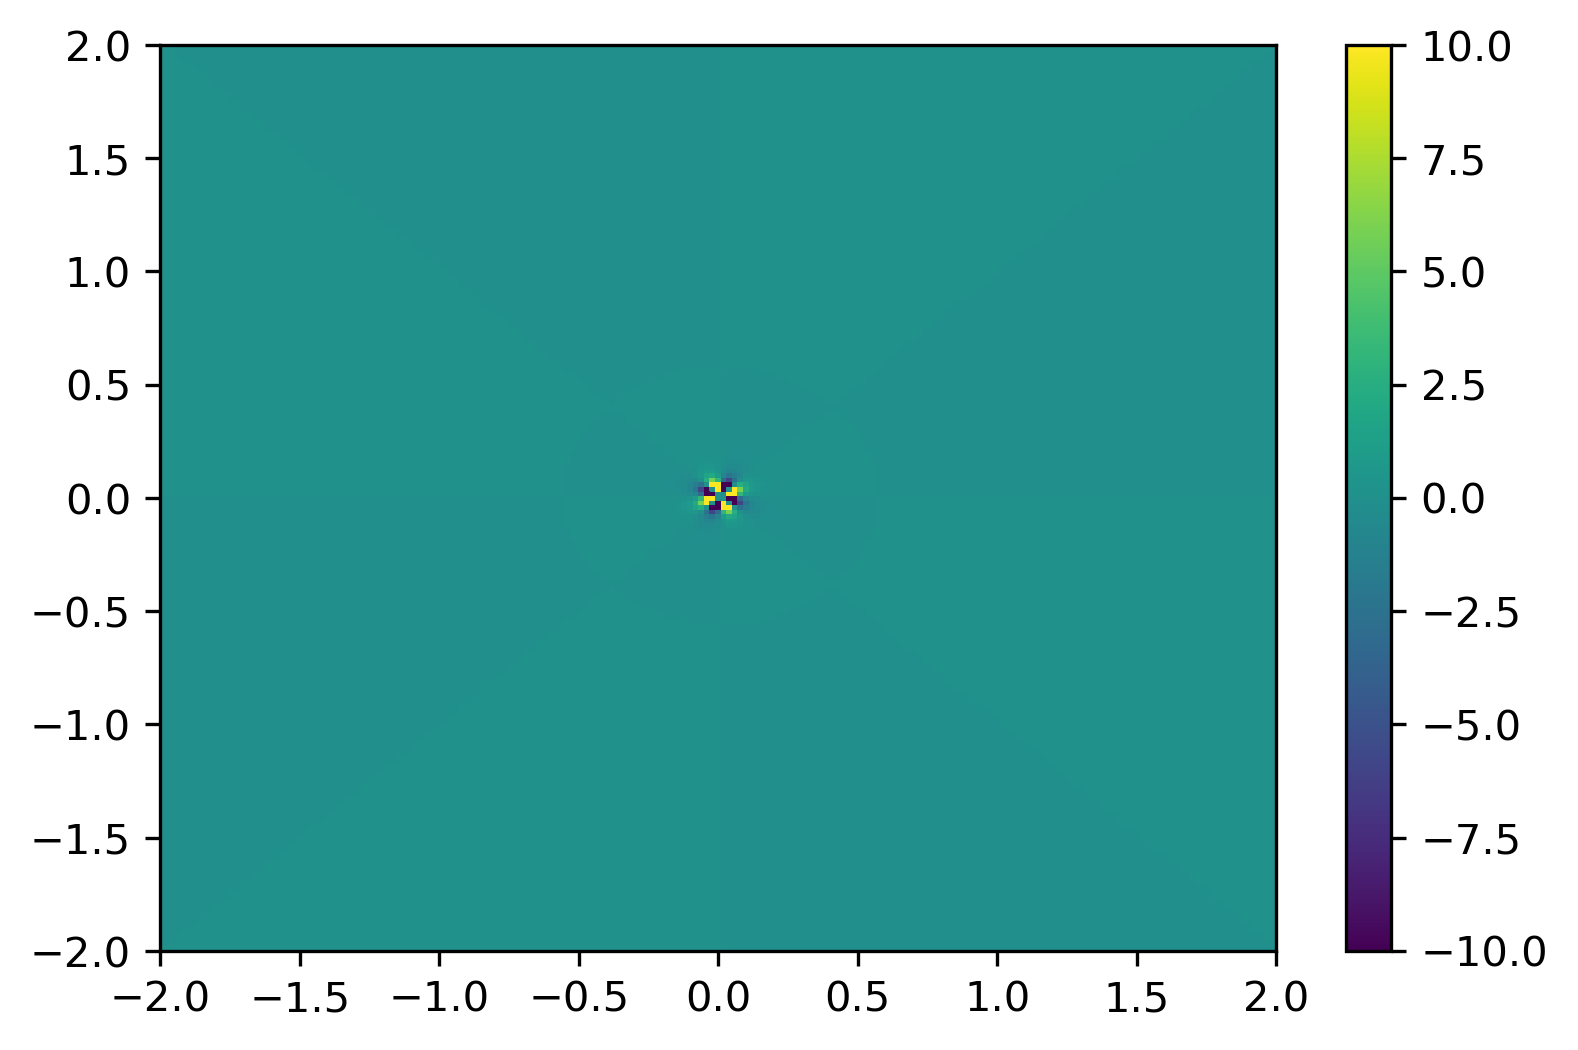

In [60]:
Phi_L1_num = lch.Phi_L1(eta, mu, nu, dx)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Phi_L1_num, vmin=-10, vmax=10)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

## Okay, we get the same behavior, but as we increase the radius of the defect, the resulting source term gets smaller

## I still do not understand why this is

## Let's check if the derivatives are even the same

In [61]:
nu_sym = Q[0, 1]
nu_sym

3*(1 - exp(-sqrt(x**2 + y**2)))*sin(2*k*atan2(y, x))/4

In [62]:
simplify(diff(nu_sym, x))

3*(2*k*y*(1 - exp(sqrt(x**2 + y**2)))*sqrt(x**2 + y**2)*cos(2*k*atan2(y, x)) + x*(x**2 + y**2)*sin(2*k*atan2(y, x)))*exp(-sqrt(x**2 + y**2))/(4*(x**2 + y**2)**(3/2))

In [63]:
dx_nu_sym_expr = lambdify([x, y], diff(nu_sym, x).subs(S, 1).subs(k, Rational(1, 2)))
dx_nu_sym = dx_nu_sym_expr(X, Y)

(-2.0, 2.0)

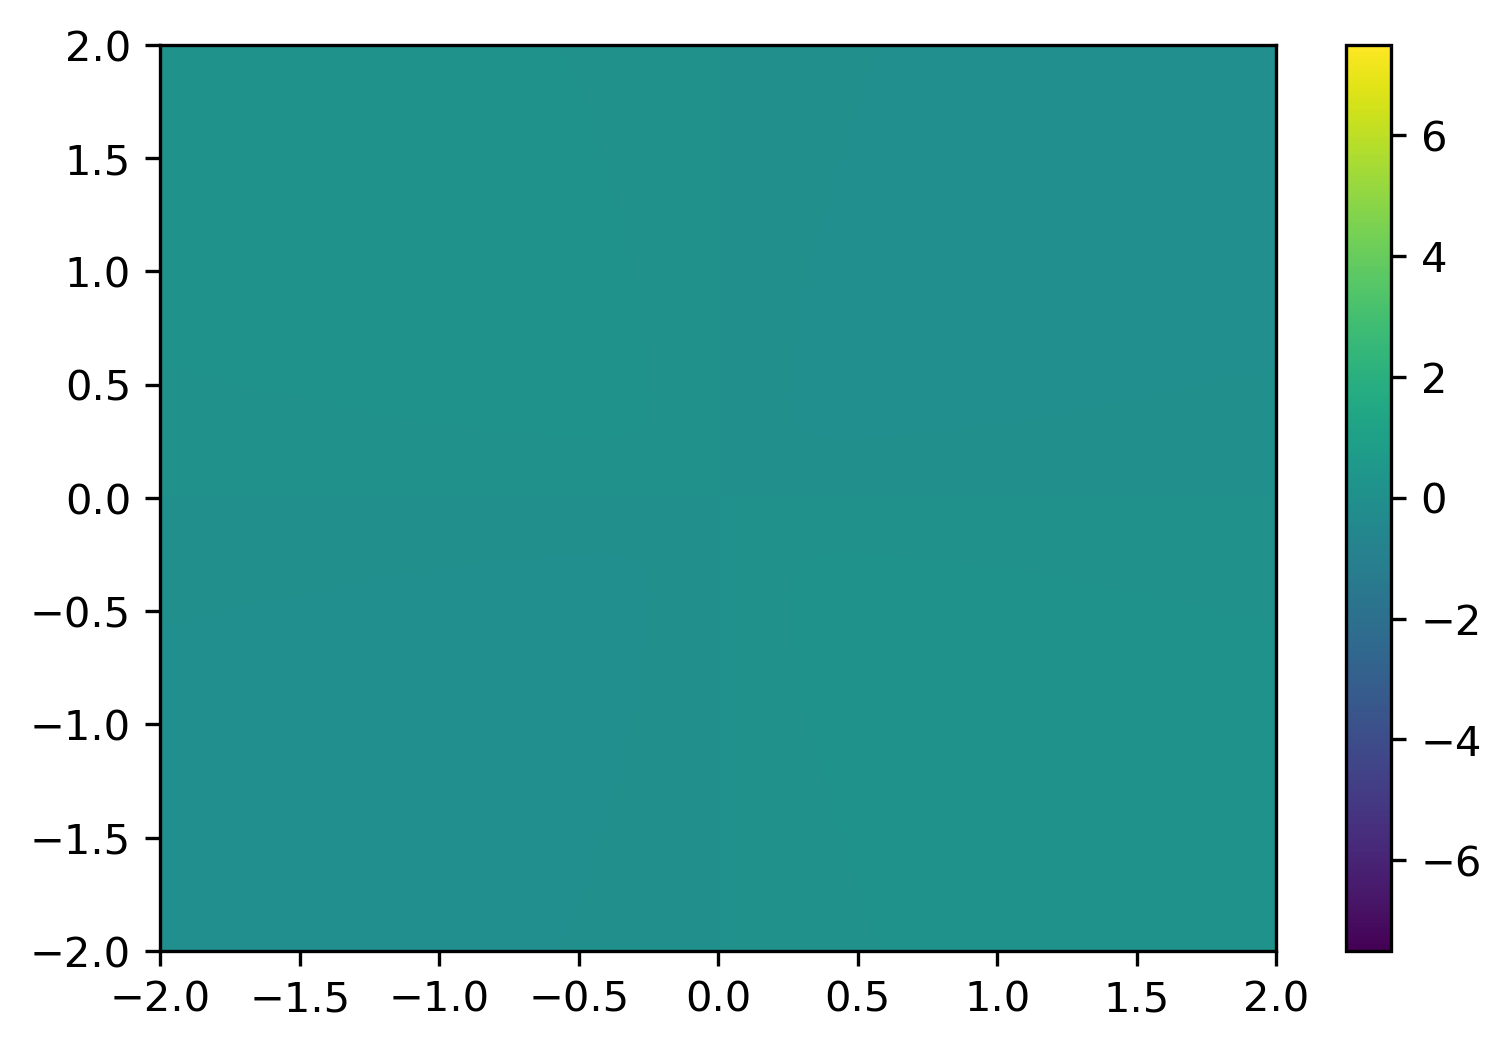

In [64]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, dx_nu_sym, vmin=-7.5, vmax=7.5)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

(-2.0, 2.0)

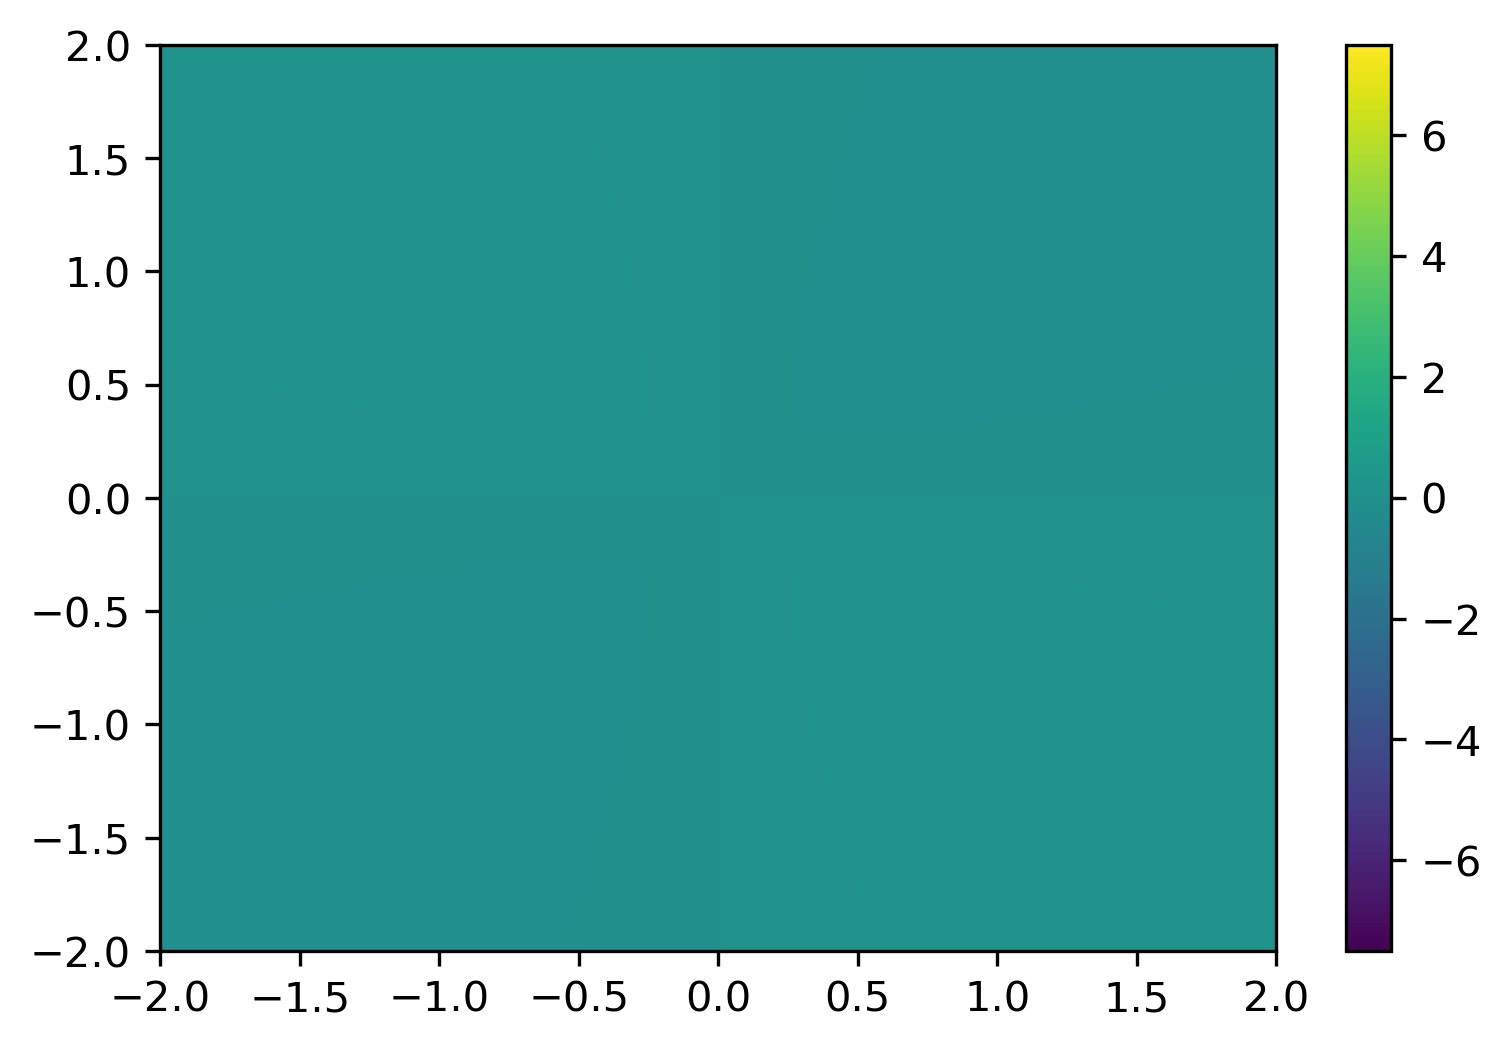

In [65]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, fd.dx(nu, dx), vmin=-7.5, vmax=7.5)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

(-2.0, 2.0)

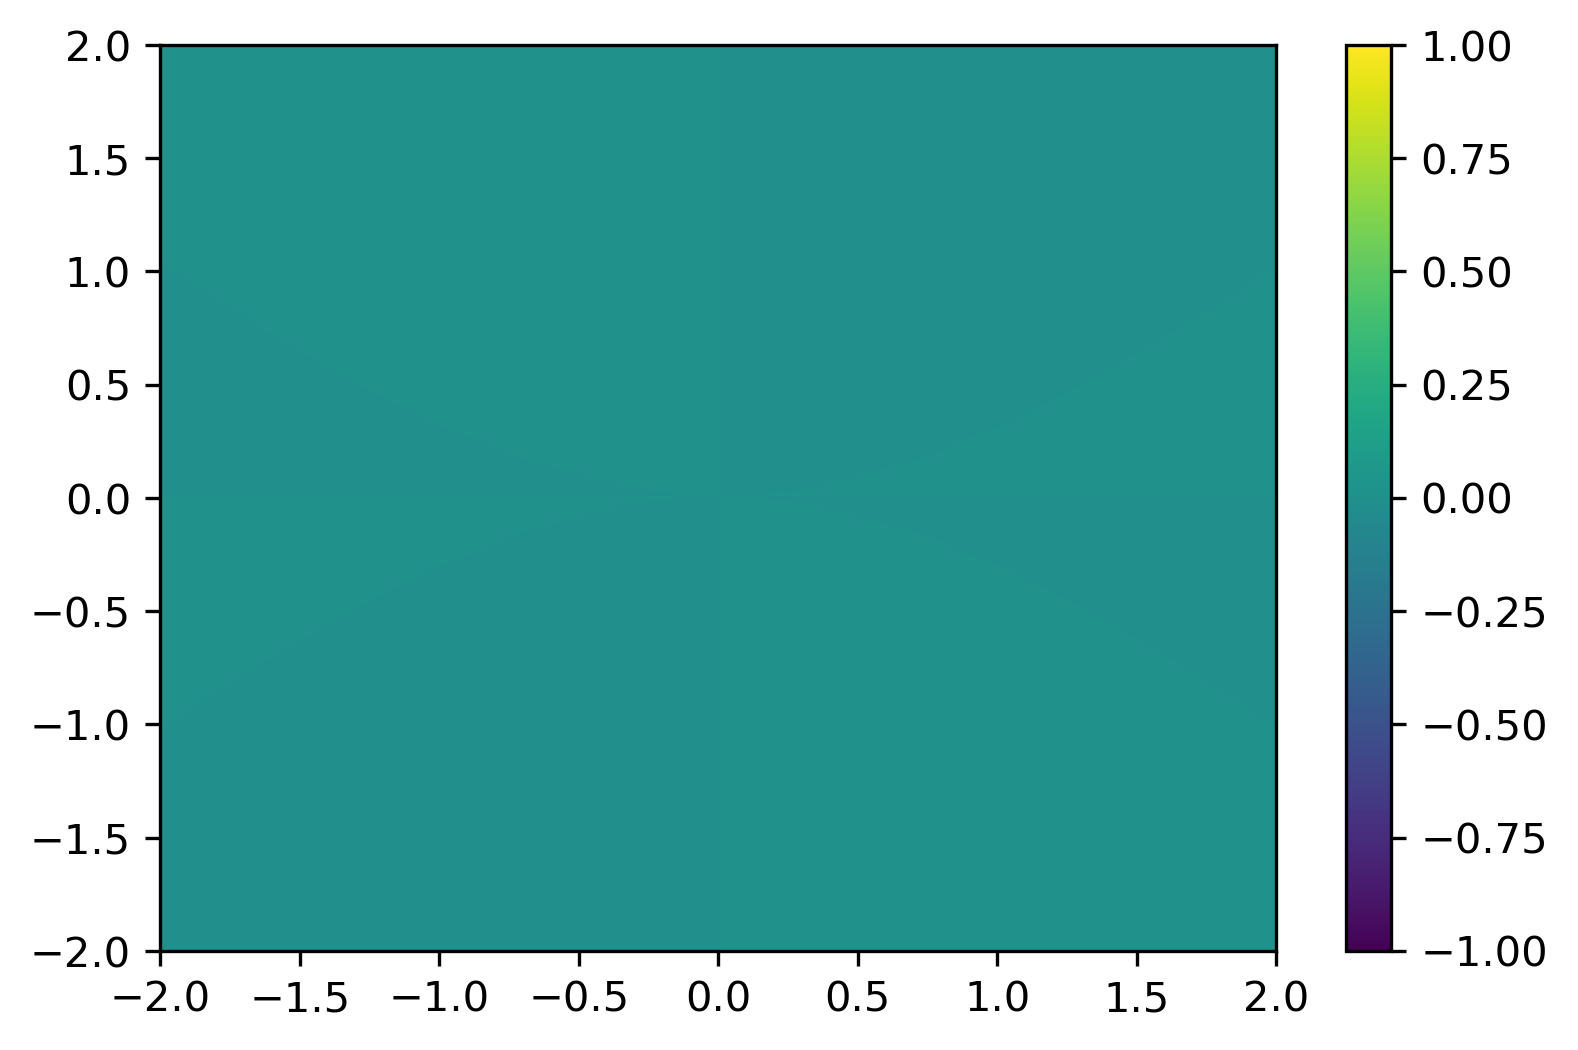

In [66]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, dx_nu_sym - fd.dx(nu, dx), vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

## They're pretty close, except right at the center

## Let's look at a second derivative

In [67]:
dx2_nu_sym_expr = lambdify([x, y], diff(diff(nu_sym, x), x).subs(S, 1).subs(k, Rational(1, 2)))
dx2_nu_sym = dx2_nu_sym_expr(X, Y)

(-2.0, 2.0)

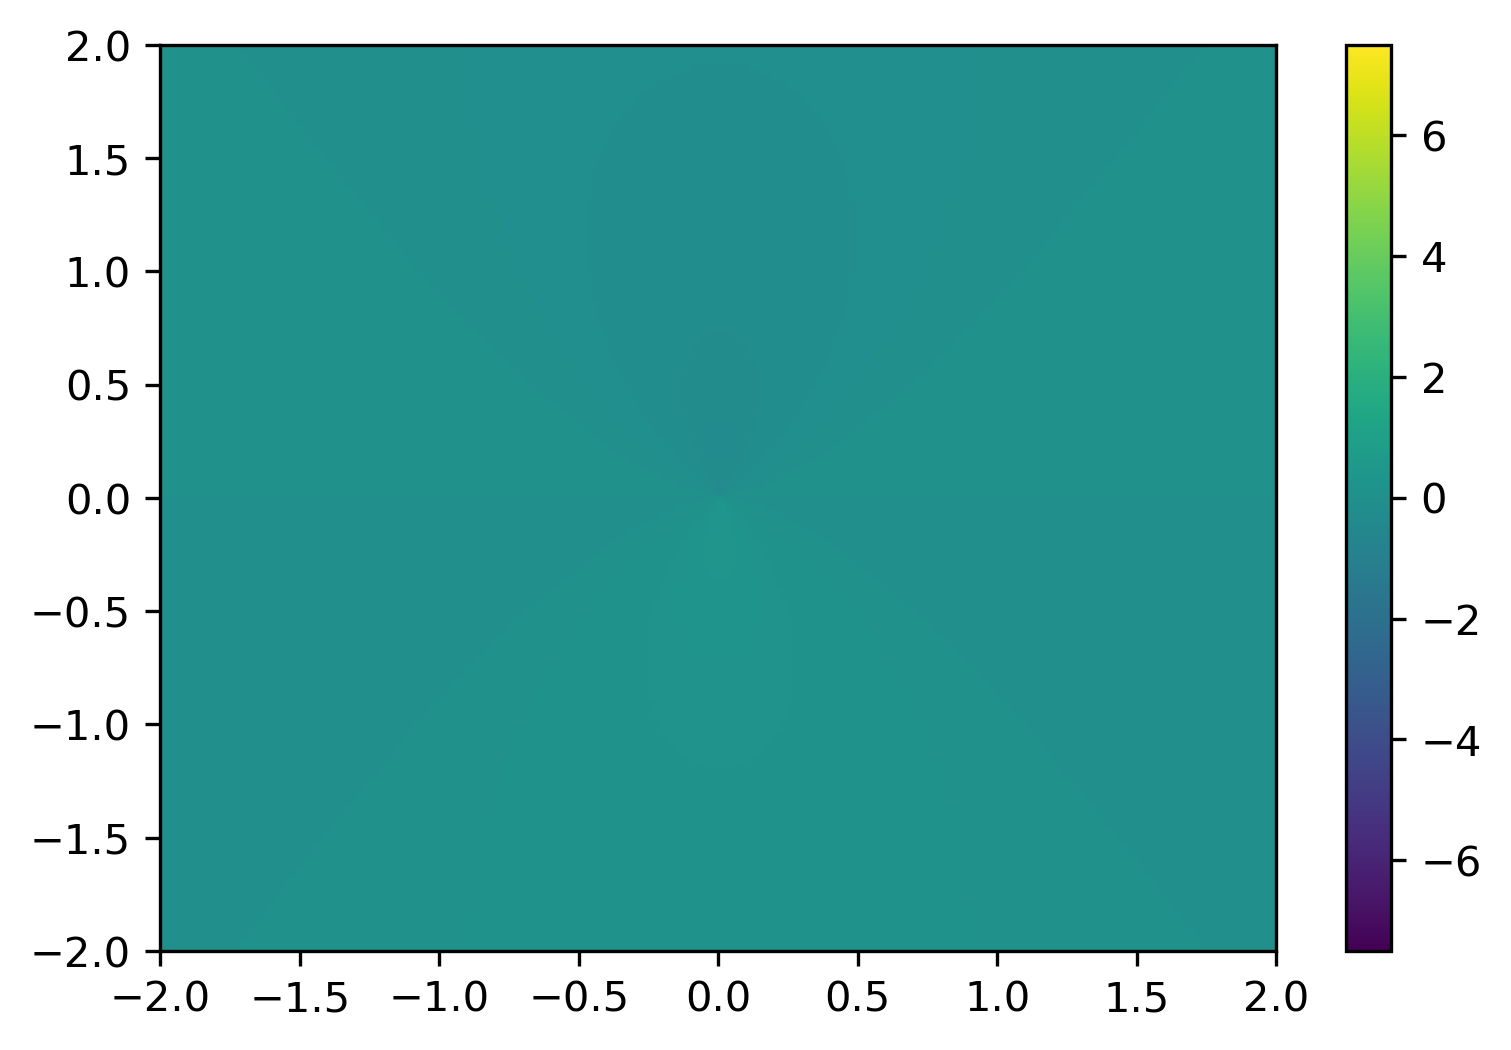

In [68]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, dx2_nu_sym, vmin=-7.5, vmax=7.5)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

(-2.0, 2.0)

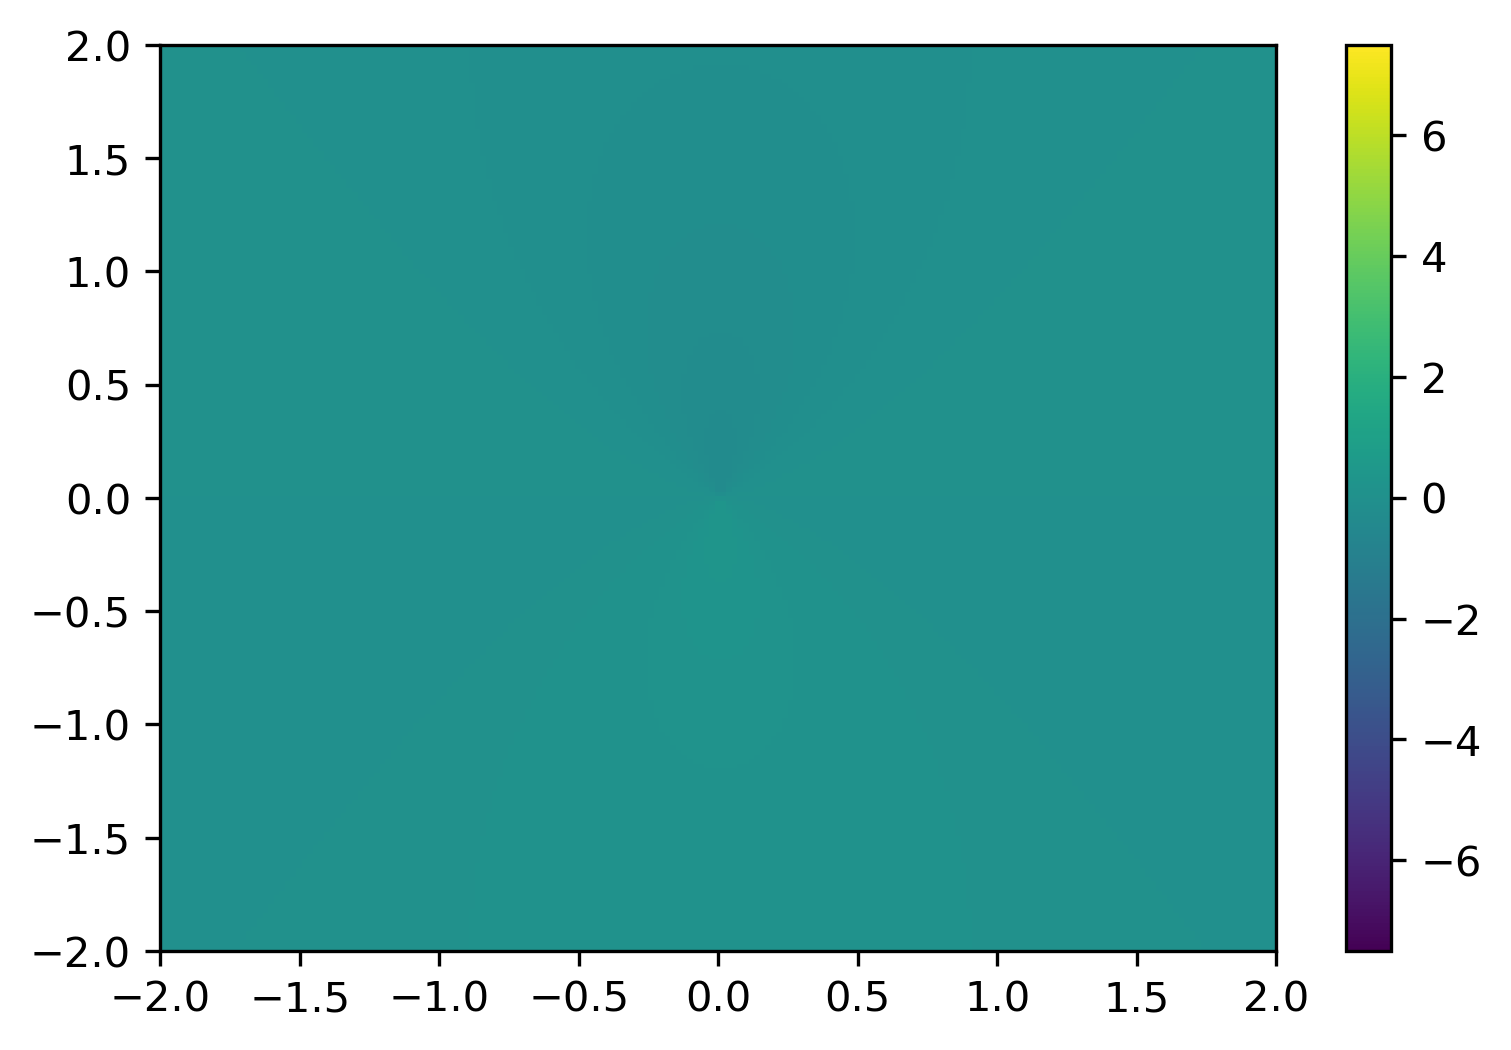

In [69]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, fd.dx2(nu, dx), vmin=-7.5, vmax=7.5)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

(-2.0, 2.0)

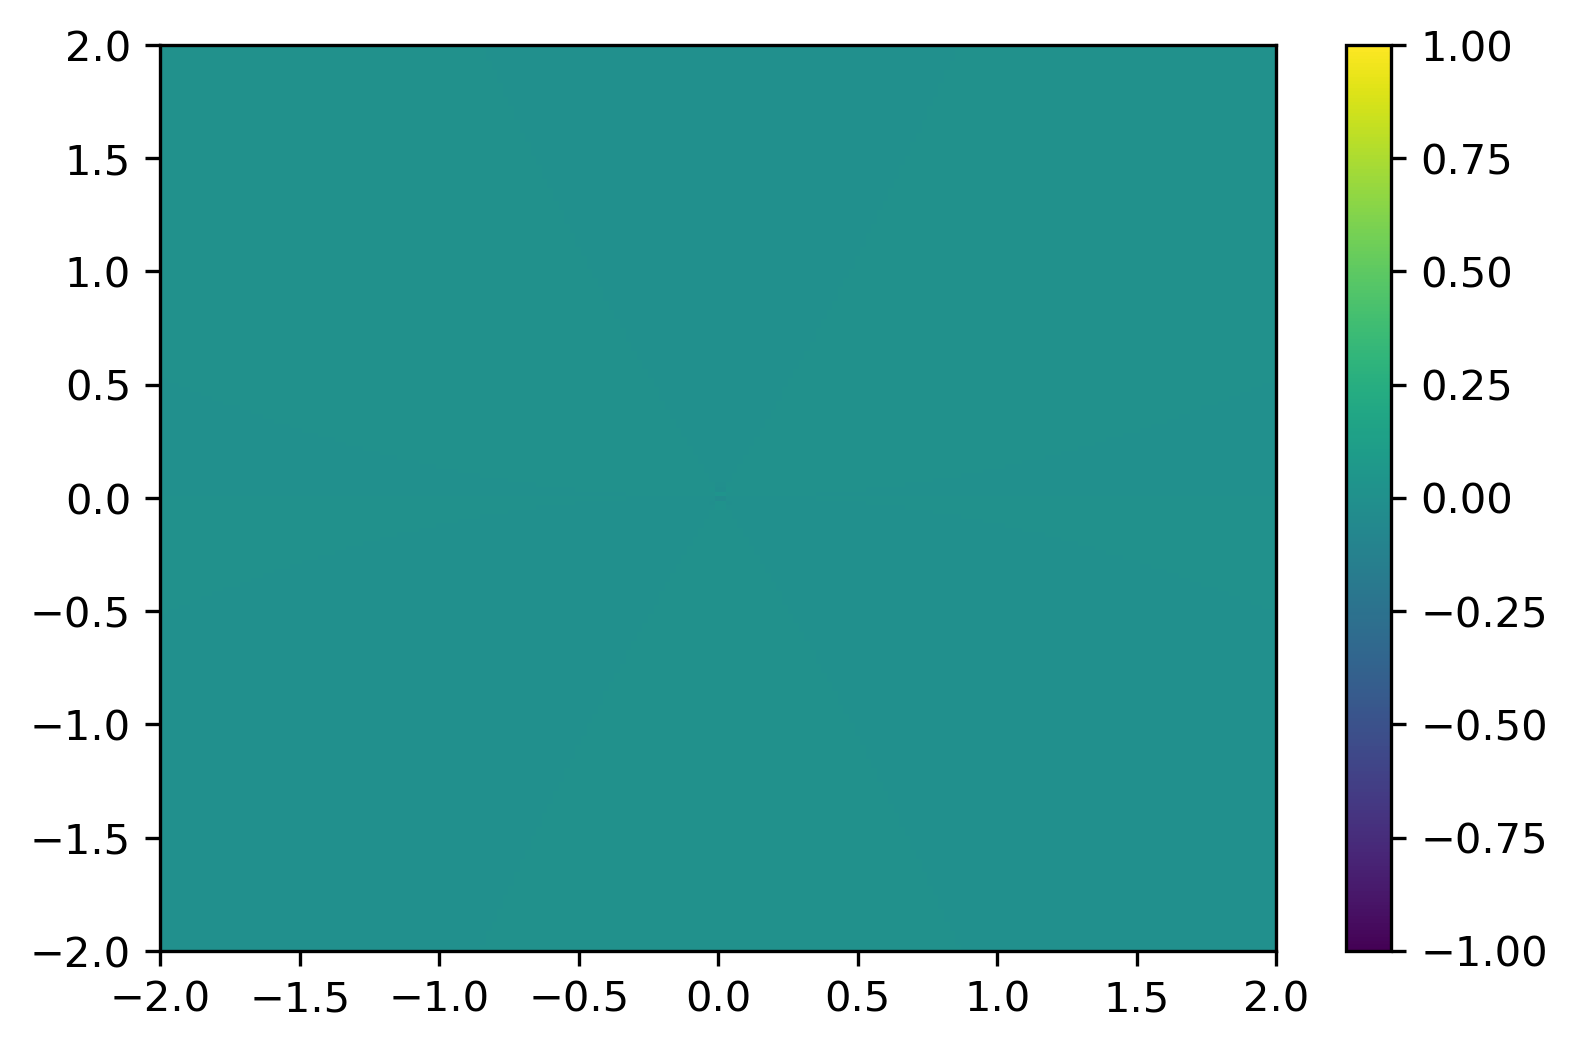

In [70]:
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, dx2_nu_sym - fd.dx2(nu, dx), vmin=-1, vmax=1)
fig.colorbar(c, ax=ax)
ax.set_xlim((-2, 2))
ax.set_ylim((-2, 2))

## I'm skeptical, because all of these discrepancies lie within a small radius -- need to check the derivatives of all of the auxiliary variables to see which one is causing the big discrepancy

## I guess we will just symbolically differentiate all of the auxiliary variables to get symbolic $\Phi_{L3}$ terms, and then lambdify the result and see the difference between the numerically calculated $\Phi_{L3}$ terms

In [71]:
eta_expr = (sqrt(3)/2)*Q[0, 0]
mu_expr = Rational(1, 2)*(Q[1, 1] - Q[2, 2])
nu_expr = Q[0, 1]

In [72]:
eta_expr = eta_expr.subs(phi, atan2(y, x))
mu_expr = mu_expr.subs(phi, atan2(y, x))
nu_expr = nu_expr.subs(phi, atan2(y, x))

In [73]:
t1_eta = 2*diff(eta_expr, x)*diff(eta_expr, (y, 3))
t2_eta = 2*diff(eta_expr, x)*diff(eta_expr, y, (x, 2))
t3_eta = -2*diff(eta_expr, y)*diff(eta_expr, (x, 3))
t4_eta = -2*diff(eta_expr, y)*diff(eta_expr, x, (y, 2))

t1_mu = 2*diff(mu_expr, x)*diff(mu_expr, (y, 3))
t2_mu = 2*diff(mu_expr, x)*diff(mu_expr, y, (x, 2))
t3_mu = -2*diff(mu_expr, y)*diff(mu_expr, (x, 3))
t4_mu = -2*diff(mu_expr, y)*diff(mu_expr, x, (y, 2))

t1_nu = 2*diff(nu_expr, x)*diff(nu_expr, (y, 3))
t2_nu = 2*diff(nu_expr, x)*diff(nu_expr, y, (x, 2))
t3_nu = -2*diff(nu_expr, y)*diff(nu_expr, (x, 3))
t4_nu = -2*diff(nu_expr, y)*diff(nu_expr, x, (y, 2))

In [74]:
eta_sym = lambdify([x, y], eta_expr.subs(k, Rational(1, 2)).subs(S, 1))(X, Y)
mu_sym = lambdify([x, y], mu_expr.subs(k, Rational(1, 2)).subs(S, 1))(X, Y)
nu_sym = lambdify([x, y], nu_expr.subs(k, Rational(1, 2)).subs(S, 1))(X, Y)

In [75]:
print(np.sum(np.abs(eta_sym - eta)))
print(np.sum(np.abs(mu_sym - mu)))
print(np.sum(np.abs(nu_sym - nu)))

1.9608950449718013e-11
1.9897376200015207e-11
5.6868397144138605e-11


# It just turned out that, on the original LiquidCrystalHelper module I hadn't changed the normalization on the auxiliary variables. Everything is okay now.

## Let's check to see if our trig identities are right

In [76]:
t_expr_1 = sin(phi/2)**6 - Rational(1, 8)*(Rational(5, 2) 
                                           - Rational(15, 4)*cos(phi)
                                           + Rational(3, 2)*cos(2*phi)
                                           - Rational(1, 4)*cos(3*phi))
t_expr_1

sin(phi/2)**6 + 15*cos(phi)/32 - 3*cos(2*phi)/16 + cos(3*phi)/32 - 5/16

In [77]:
# try for a bunch of different numbers to see if they're right
t_expr_1.subs(phi, 1.3).evalf()

0

In [78]:
t_expr_2 = sin(phi/2)**4 - (Rational(3, 8)
                            - Rational(1, 2)*cos(phi)
                            + Rational(1, 8)*cos(2*phi))

t_expr_2

sin(phi/2)**4 + cos(phi)/2 - cos(2*phi)/8 - 3/8

In [79]:
# try for a bunch of different numbers to see if they're right
t_expr_2.subs(phi, 1).evalf()

0.e-127

In [80]:
simplify(cos(phi)*sin(phi) - Rational(1, 2)*sin(2*phi))

0

In [81]:
simplify(cos(2*phi)*sin(phi) - Rational(1, 2)*(sin(3*phi) - sin(phi)))

0

In [82]:
t_expr_3 = sin(phi/2)**4*sin(phi) - (Rational(5, 16)*sin(phi)
                                     - Rational(1, 4)*sin(2*phi)
                                     + Rational(1, 16)*sin(3*phi))

simplify(t_expr_3)

sin(phi/2)**4*sin(phi) - 5*sin(phi)/16 + sin(2*phi)/4 - sin(3*phi)/16

In [83]:
t_expr_3.subs(phi, 2).evalf()

-0.e-127

In [84]:
t_expr_4 = sin(phi/2)**6*sin(2*phi) - (-Rational(7, 32)*sin(phi)
                                       + Rational(5, 16)*sin(2*phi)
                                       - Rational(15, 64)*sin(3*phi)
                                       + Rational(3, 32)*sin(4*phi)
                                       - Rational(1, 64)*sin(5*phi))

In [85]:
t_expr_4.subs(phi, 2.01).evalf()

1.11022302462516e-16

## Okay, let's actually write out the expression for the anisotropic term

In [86]:
sin_6_term = (-Rational(7, 32)*sin(phi) 
              + Rational(5, 16)*sin(2*phi) 
              - Rational(15, 64)*sin(3*phi) 
              + Rational(3, 32)*sin(4*phi)
              - Rational(1, 64)*sin(5*phi))

def sin_4_term(k):
    return (Rational(3, 8)*sin(k*phi)
            - Rational(1, 4)*(sin((k + 1)*phi) + sin((k - 1)*phi))
            + Rational(1, 16)*(sin((k + 2)*phi) + sin((k - 2)*phi)) )

In [87]:
Phi_L3_alt_expr = 27*S**3/(256*r**4) * ( 64*sin_6_term + 96*sin_4_term(1)
                                        - 96*sin_4_term(2) - 64*sin_4_term(3)
                                        - 12*sin(phi) + 24*sin(2*phi) + 9*sin(3*phi)
                                        - 16*sin(4*phi) + 5*sin(5*phi))

In [88]:
(Phi_L3 - Phi_L3_alt_expr).subs(S, 1).subs(r, 1).subs(phi, 0.1).evalf()

-6.04349537536471e-17

In [89]:
Phi_L3_alt_expr

81*S**3*sin(phi)/(32*r**4)

## Looks like it comes out even simpler than we thought it would!

In [90]:
print(latex(Phi_L3_alt_expr))

\frac{81 S^{3} \sin{\left(\phi \right)}}{32 r^{4}}


# Trying to solve the resulting differential equation

In [91]:
lam = symbols('lambda')
R = Function('R')(r)
F = (1/r)*diff( r*diff( (1/r)*diff( r*diff(R, r), r ), r ), r)
simplify(F)

Derivative(R(r), (r, 4)) + 2*Derivative(R(r), (r, 3))/r - Derivative(R(r), (r, 2))/r**2 + Derivative(R(r), r)/r**3

In [92]:
expr = ( R.diff(r, 4) 
         + (2/r)*R.diff(r, 3)
         - (1/r**2)*(1 + 2*m**2)*R.diff(r, 2)
         + (1/r**3)*(1 + 2*m**2)*R.diff(r)
         + (1/r**4)*(m**4 - 4*m**2)*R )
expr

Derivative(R(r), (r, 4)) + 2*Derivative(R(r), (r, 3))/r - (2*m**2 + 1)*Derivative(R(r), (r, 2))/r**2 + (2*m**2 + 1)*Derivative(R(r), r)/r**3 + (m**4 - 4*m**2)*R(r)/r**4

In [93]:
c1, c2, c3, c4 = symbols('c_1 c_2 c_3 c_4')
sol = c1*r**(-m) + c2*r**(2 - m) + c3*r**(2 + m) + c4*r**(m)
simplify(expr.subs(R, sol).doit())

0

## Hence, sol is a solution to the homogeneous diff eq

## Let's plot the final velocity solution

In [94]:
def psi_analytic(theta, r, r0=1):
    return ( (-1/6)*(r/r0)**3 + (1/2)*(r/r0) - (1/3) )*np.sin(theta)

In [95]:
def v_analytic(theta, r, r0=1):
    return ( -( -(1/2)*(r**2/r0**3) + (1/2)*(1/r0) )*np.sin(theta),
              ( -(1/6)*(r**2/r0**3) + (1/2)*(1/r0) - (1/3)*(1/r) )*np.cos(theta) )

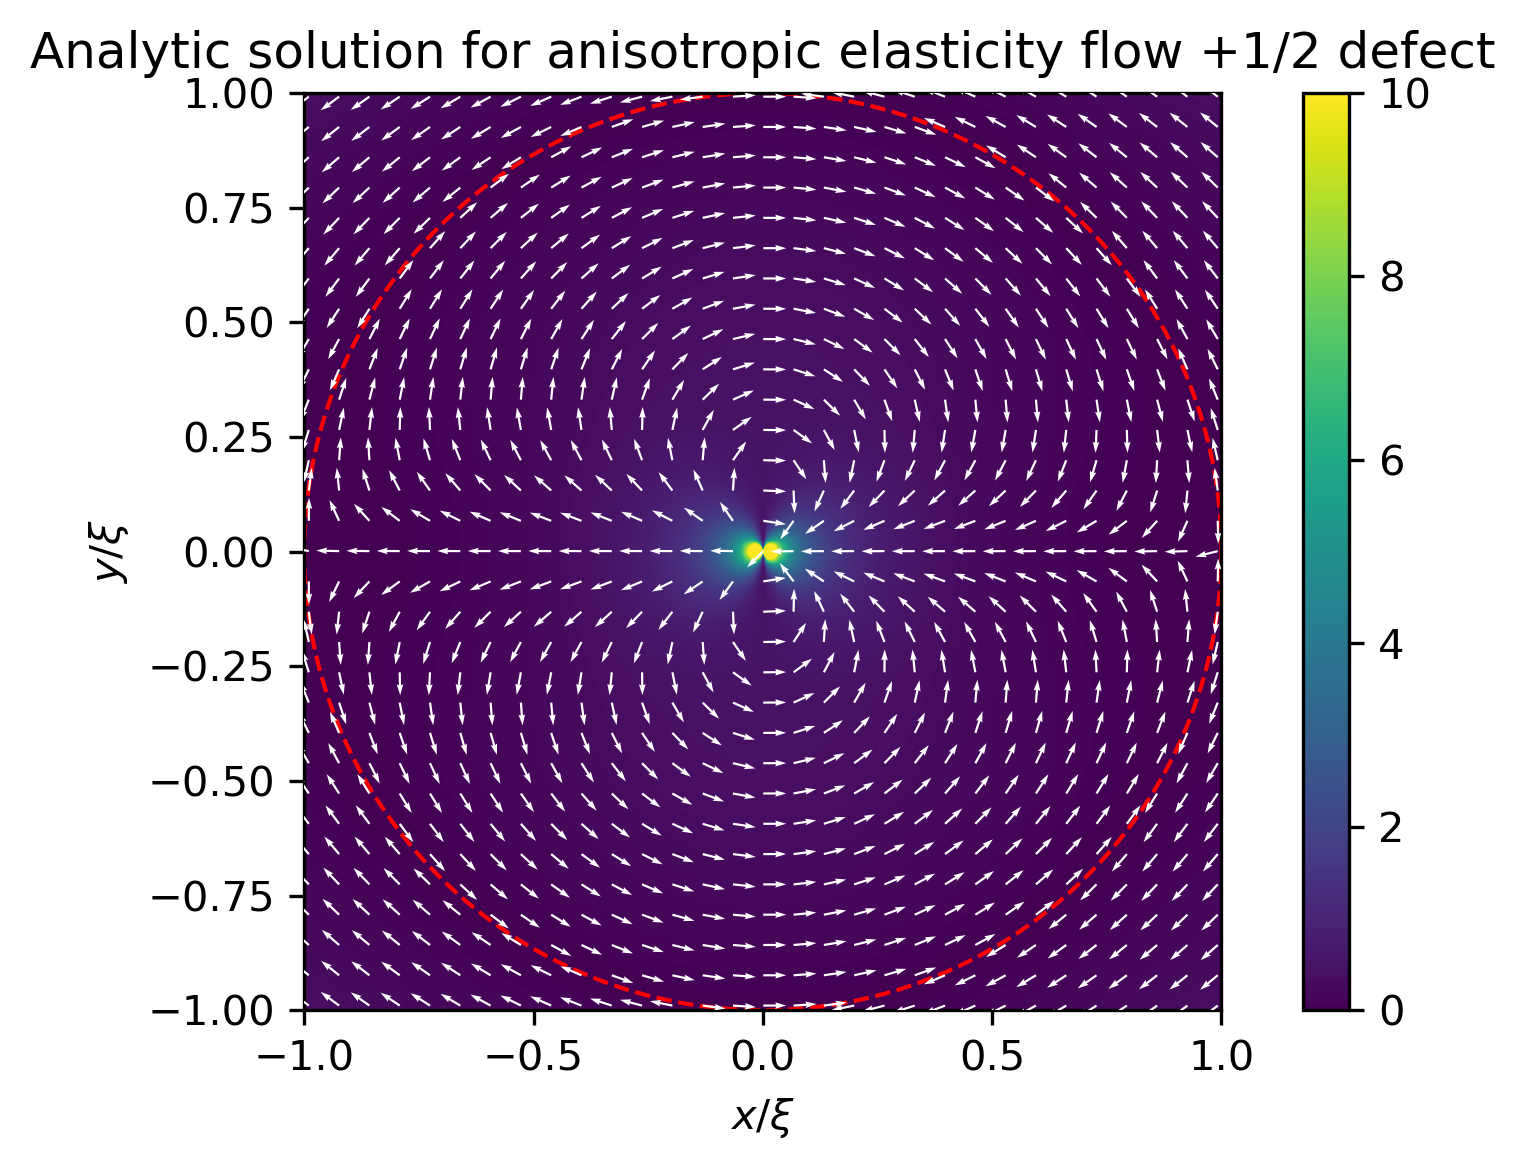

In [149]:
l = 1
n = 1000
field_shape = (30, 30)
title = "Analytic solution for anisotropic elasticity flow +1/2 defect"

x = np.linspace(-l, l, num=n)
y = np.linspace(-l, l, num=n)
X, Y = np.meshgrid(x, y, indexing='ij')

R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)
v_theta, v_r = v_analytic(Theta, R)

# convert to cartesian coordinates
vx = v_r*np.cos(Theta) - v_theta*np.sin(Theta)
vy = v_r*np.sin(Theta) + v_theta*np.cos(Theta)
v = np.sqrt(vx**2 + vy**2)

# normalize velocity components, except where v = 0
mask = np.where(v != 0)
vx_norm = np.zeros(vx.shape)
vy_norm = np.zeros(vy.shape)
vx_norm[mask] = vx[mask]/v[mask]
vy_norm[mask] = vy[mask]/v[mask]

# indices of field where arrows will go
sparse_idx = lch.sparseIdx(vx.shape, field_shape)

# plot velocity magnitude and direction (w/quiver)
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, v, vmin=0, vmax=10)
fig.colorbar(c, ax=ax)
q = ax.quiver(X[sparse_idx], Y[sparse_idx],
              vx_norm[sparse_idx], vy_norm[sparse_idx], pivot='tail', color='w', zorder=3, scale=40)

theta = np.linspace(0, 2*np.pi, num=1000)
x_circ = np.cos(theta)
y_circ = np.sin(theta)
ax.plot(x_circ, y_circ, color='r', ls='--', lw=1)

S_cutoff = 0.2
sparse_shape = (30, 30)

lambda_max = lch.calcQEigenvals(eta, mu, nu)
U, V = lch.calcQEigenvecs(eta, mu, nu, lambda_max, S_cutoff)

sparse_idx = lch.sparseIdx(eta.shape, sparse_shape)

# q2 = ax.quiver(X[sparse_idx], Y[sparse_idx], U[sparse_idx], V[sparse_idx],
#                headwidth=0, pivot='middle', headaxislength=5, scale=35, width=0.002, color='r', zorder=2)

# label everything
ax.set_title(title)
ax.set_xlabel(r'$x/\xi$')
ax.set_ylabel(r'$y/\xi$')
ax.set_aspect('equal', 'box')
fig.tight_layout()

config_filename = os.path.join(save_folder, r'analytic-anisotropic-1_2-defect.png')
fig.savefig(config_filename)

## Let's plot the numerical solution to each of the resulting flows

In [150]:
import biharm as bh

In [151]:
l = 1
n = 1000

x_num = np.linspace(-l, l, num=n)
dx = x_num[1] - x_num[0]
y_num = x_num

X, Y = np.meshgrid(x_num, y_num, indexing='ij')
phi_num = (1/2)*np.arctan2(Y, X)
S_num = np.ones(phi_num.shape)

Q_num = lch.uniaxialQ(S_num, phi_num)
eta, mu, nu = lch.auxVars(Q_num)

In [152]:
L = [2*l, 2*l]
shape = [n - 1, n - 1]
alpha = 0
maxiter = 500

bh_solver = bh.Biharm(L, shape, alpha, cg_maxiter=maxiter)

In [153]:
Phi_L3_num = lch.Phi_L3(eta, mu, nu, dx)

In [154]:
psi = np.zeros(eta.shape)
psi[1:-1, 1:-1], info, calls = bh_solver.solve(Phi_L3_num[1:-1, 1:-1])

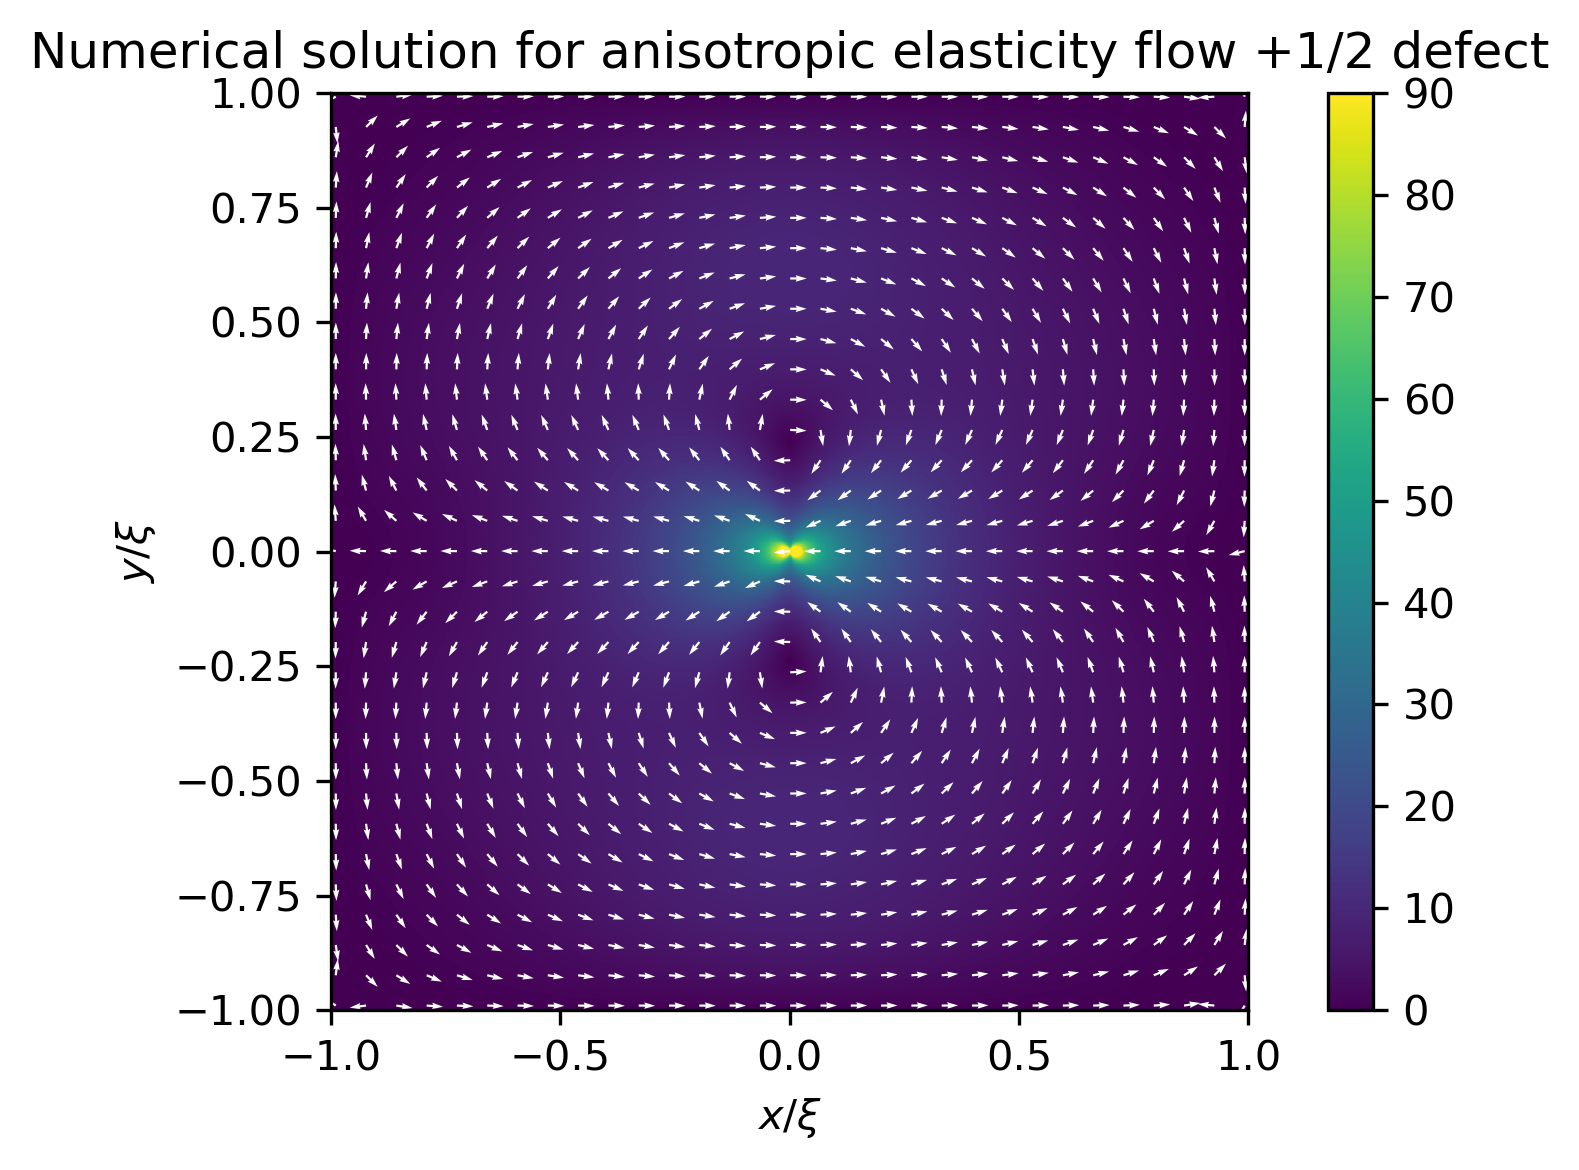

In [160]:
title = "Numerical solution for anisotropic elasticity flow +1/2 defect"

# get grid-spacing
dx = X[1, 0] - X[0, 0]

# calculate velocities
vx, vy = fd.curl(psi, dx)
v = np.sqrt(vx**2 + vy**2)

# normalize velocity components, except where v = 0
mask = np.where(v != 0)
vx_norm = np.zeros(vx.shape)
vy_norm = np.zeros(vy.shape)
vx_norm[mask] = vx[mask]/v[mask]
vy_norm[mask] = vy[mask]/v[mask]

# indices of field where arrows will go
sparse_idx = lch.sparseIdx(vx.shape, field_shape)

# plot velocity magnitude and direction (w/quiver)
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, v, vmin=0, vmax=90)
fig.colorbar(c, ax=ax)
q = ax.quiver(X[sparse_idx], Y[sparse_idx],
              vx_norm[sparse_idx], vy_norm[sparse_idx], pivot='tail', color='w')

# label everything
ax.set_title(title)
ax.set_xlabel(r'$x/\xi$')
ax.set_ylabel(r'$y/\xi$')
ax.set_aspect('equal', 'box')
fig.tight_layout()

config_filename = os.path.join(save_folder, r'numerical-anisotropic-1_2-defect.png')
fig.savefig(config_filename)

## Let's plot the numerical result for the isotropic elasticity terms

In [161]:
Phi_L1_num = lch.Phi_L1(eta, mu, nu, dx)

In [164]:
psi = np.zeros(eta.shape)
psi[1:-1, 1:-1], info, calls = bh_solver.solve(Phi_L1_num[1:-1, 1:-1])

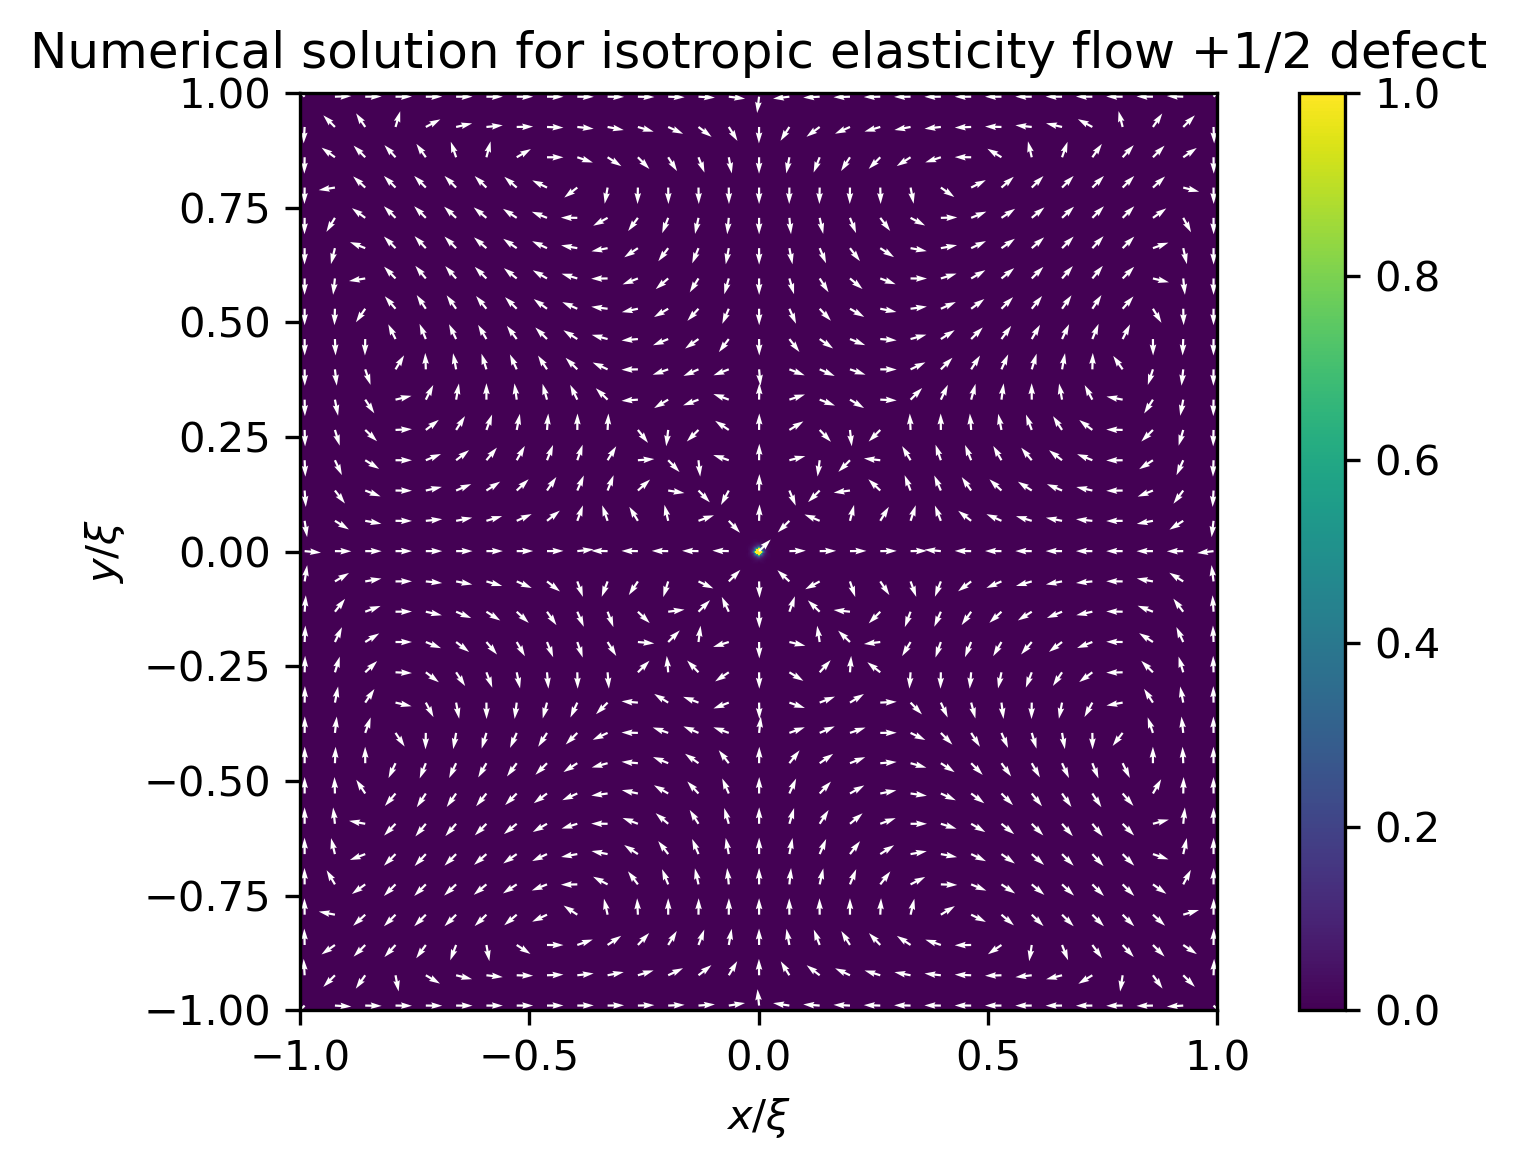

In [166]:
title = "Numerical solution for isotropic elasticity flow +1/2 defect"

# get grid-spacing
dx = X[1, 0] - X[0, 0]

# calculate velocities
vx, vy = fd.curl(psi, dx)
v = np.sqrt(vx**2 + vy**2)

# normalize velocity components, except where v = 0
mask = np.where(v != 0)
vx_norm = np.zeros(vx.shape)
vy_norm = np.zeros(vy.shape)
vx_norm[mask] = vx[mask]/v[mask]
vy_norm[mask] = vy[mask]/v[mask]

# indices of field where arrows will go
sparse_idx = lch.sparseIdx(vx.shape, field_shape)

# plot velocity magnitude and direction (w/quiver)
fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, v, vmin=0, vmax=1)
fig.colorbar(c, ax=ax)
q = ax.quiver(X[sparse_idx], Y[sparse_idx],
              vx_norm[sparse_idx], vy_norm[sparse_idx], pivot='tail', color='w')

# label everything
ax.set_title(title)
ax.set_xlabel(r'$x/\xi$')
ax.set_ylabel(r'$y/\xi$')
ax.set_aspect('equal', 'box')
fig.tight_layout()

config_filename = os.path.join(save_folder, r'numerical-isotropic-1_2-defect.png')
fig.savefig(config_filename)

## Plot the source term

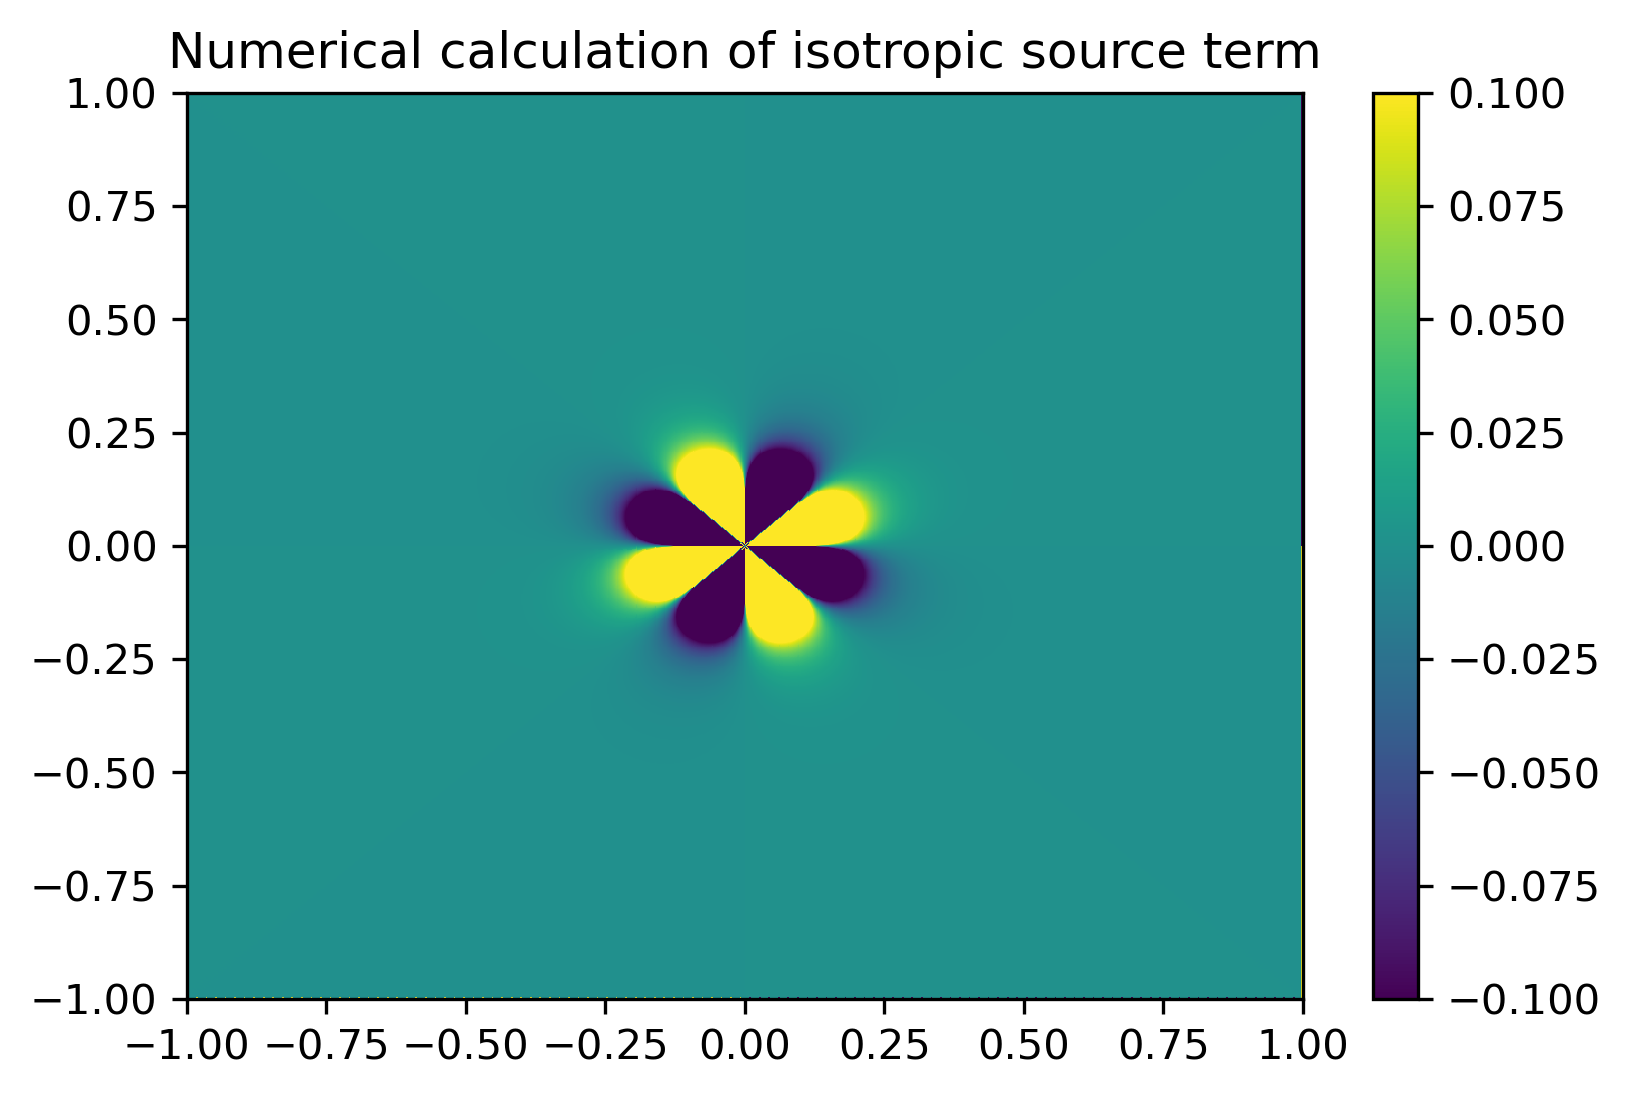

In [167]:
title = "Numerical calculation of isotropic source term"

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Phi_L1_num, vmin=-.1, vmax=.1)
fig.colorbar(c, ax=ax)
ax.set_title(title)

config_filename = os.path.join(save_folder, r'numerical-isotropic-source-term.png')
fig.savefig(config_filename)